In [2]:
! pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 16.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import json

# Load the data
data = pd.read_csv('/teamspace/studios/this_studio/sample-synthetic-healthcare.csv')
data.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3.0,Z,3.0,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2.0,51-60,4911.0,0-10
1,2,2,c,5.0,Z,2.0,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,5954.0,41-50
2,3,10,e,1.0,X,2.0,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,4745.0,31-40
3,4,26,b,NaN,Y,2.0,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,7272.0,41-50
4,5,26,b,2.0,Y,2.0,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2.0,51-60,5558.0,41-50


# plan for visualiazation
1. read the number of colums z = total columns
if 11 colums are there 50 %  a = z // 2 = 5 will be verucal bar chart
b =  z - a will be horizontal colured bar chart

#  we will load config file 
1. all numeric data 
if 5 colums colum 1 vs colum 2  =  scatter plot
if 5 colums all nueric  = line plot

2. categerial data 
1. we well make colum 1 vs colum 2 = heatmap 

3. mixed 
all categerial colum will ve mate violine chart with 1st numeric column
 



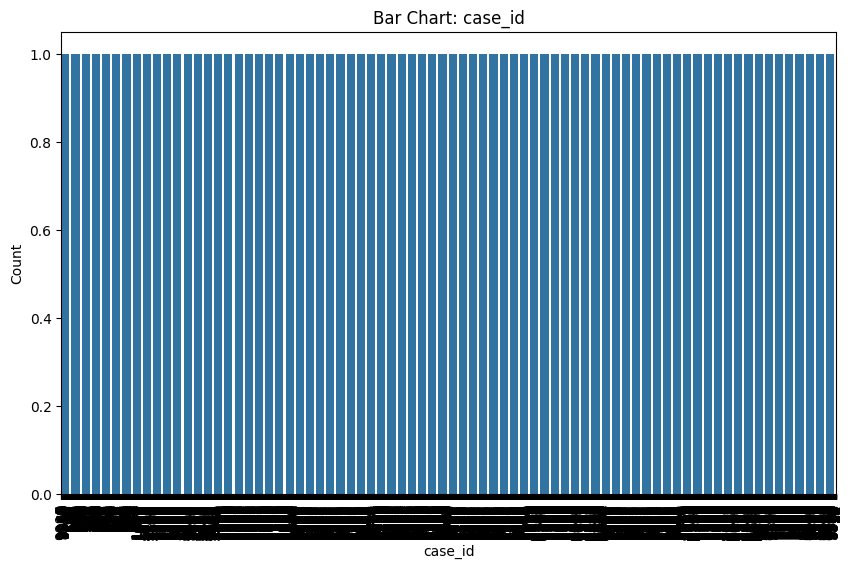

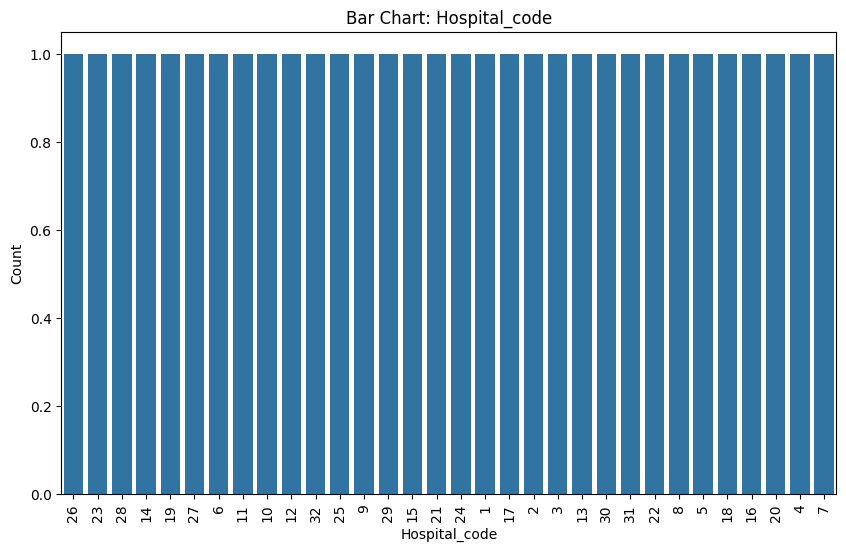

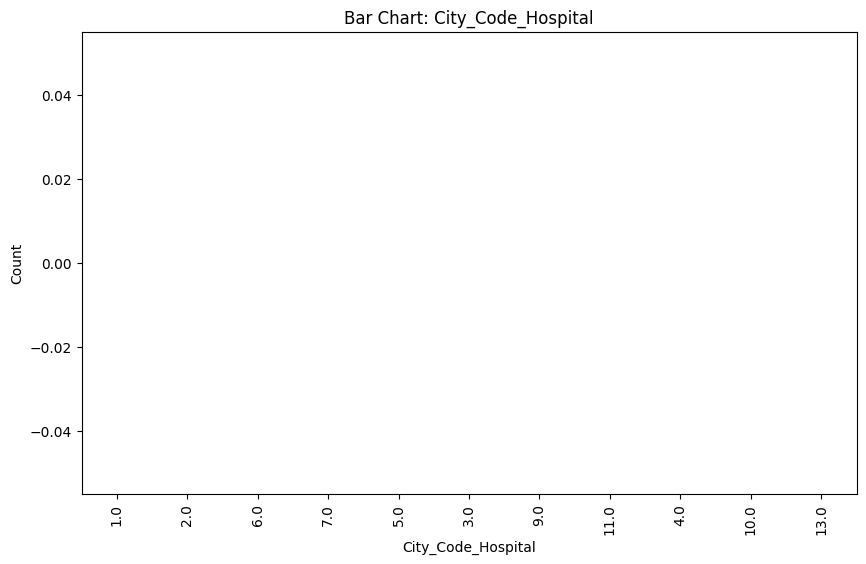

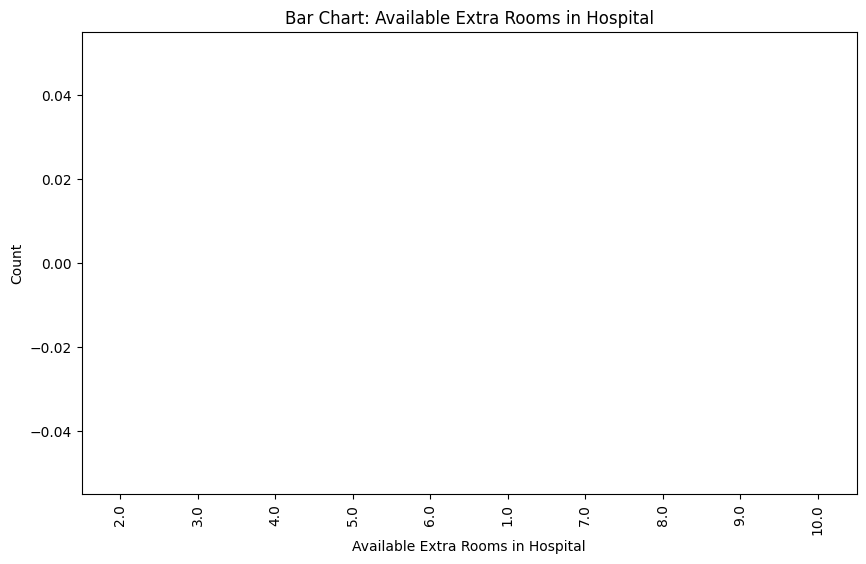

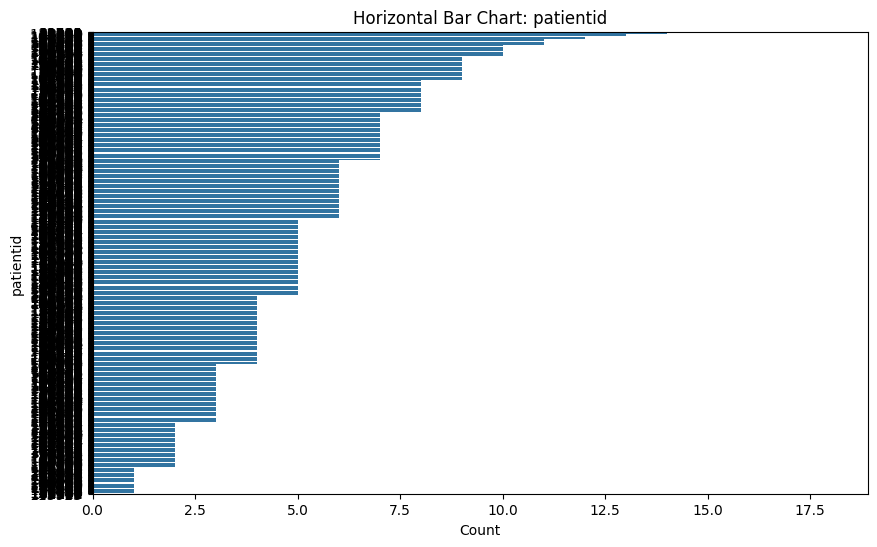

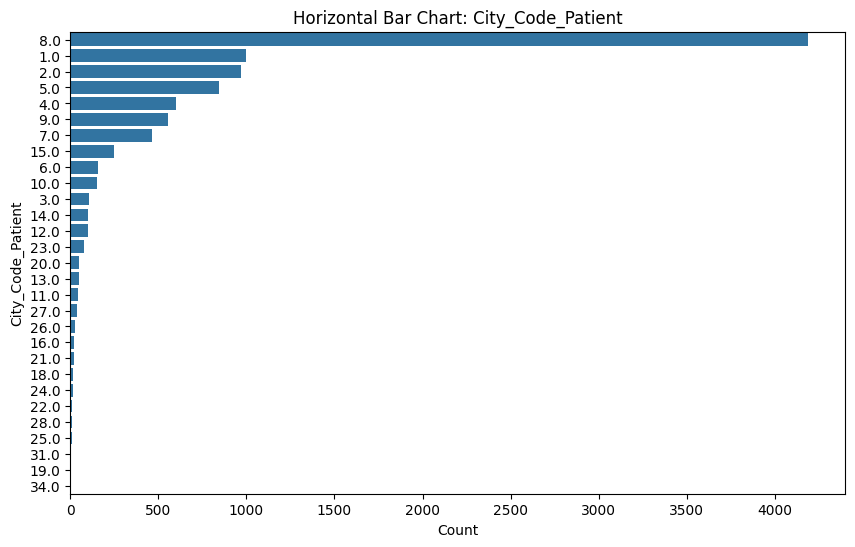

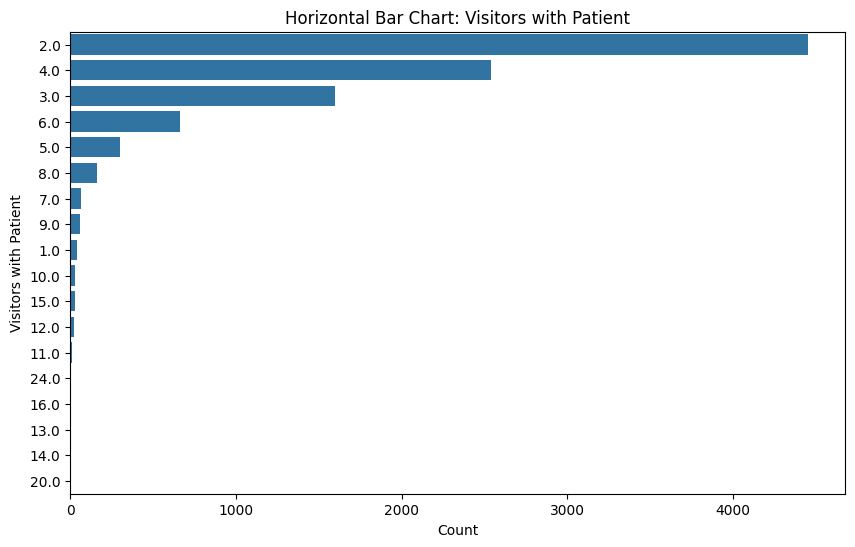

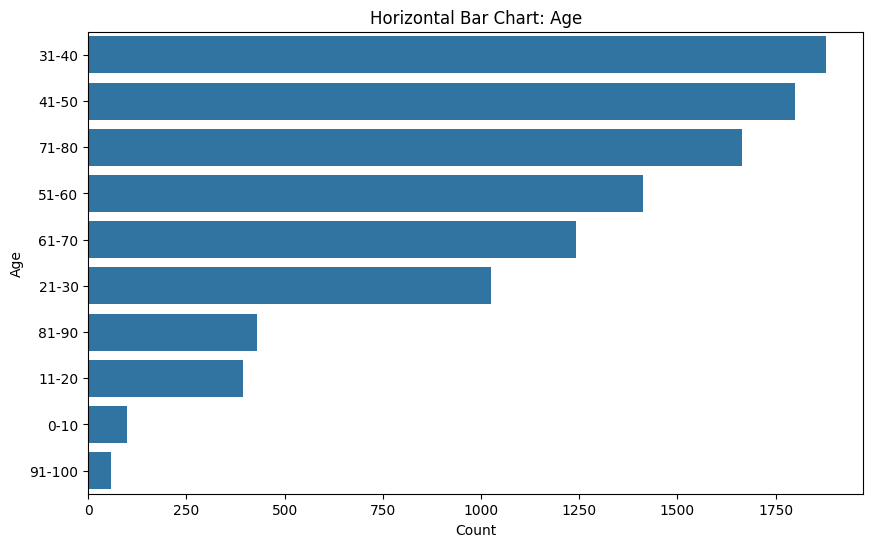

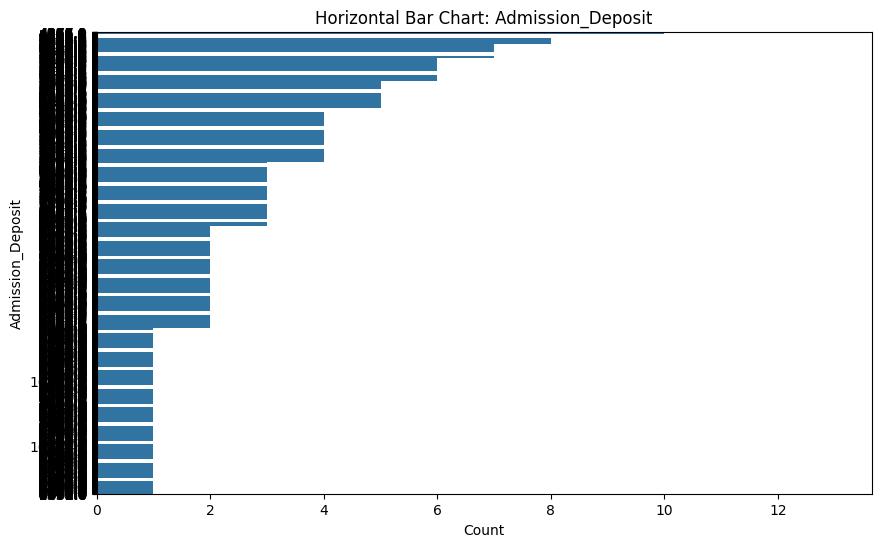

TypeError: scatter_plot() missing 3 required positional arguments: 'title', 'xlabel', and 'ylabel'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import json
# Load data from CSV orifginal not cleaned
data = pd.read_csv('sample-synthetic-healthcare.csv')

# Load classifications from JSON file (replace with your actual JSON file path)
classifications_file_path = '/teamspace/studios/this_studio/csvandmetadata export /json/claasification_555.json'
with open(classifications_file_path, 'r') as f:
    classifications = json.load(f)

numeric_columns = classifications['Numeric Data']
categorical_columns = classifications['Categorical Data']

def bar_chart(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(data[column], order = data[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

def hbar_chart(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[column], order = data[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def scatter_plot(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


def line_plot(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def heatmap(x, y , title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

def palette_bar_chart(data, column, title, xlabel, ylabel, palette):
    plt.figure(figsize=(10, 6))
    sns.countplot(data[column], order = data[column].value_counts().index, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()


def numeric_bar_charts(data, numeric_columns):
    num_cols = len(numeric_columns)
    half_cols = num_cols // 2

    # Create bar charts for the first half of numeric columns
    for i, col in enumerate(numeric_columns[:half_cols]):
        bar_chart(data, col, f"Bar Chart: {col}", col, "Count")

    # Create horizontal bar charts for the second half of numeric columns
    for i, col in enumerate(numeric_columns[half_cols:]):
        hbar_chart(data, col, f"Horizontal Bar Chart: {col}", "Count", col)

    # Create scatter plots for the first half of numeric columns
    for i, col in enumerate(numeric_columns[:half_cols]):
        scatter_plot(data, col, f"Scatter Plot: {col}")

    # Create line plots for the second half of numeric columns
    for i, col in enumerate(numeric_columns[half_cols:]):
        line_plot(data, col, f"Line Plot: {col}")
     

def categorical_charts(data, categorical_columns):
    for i, col in enumerate(categorical_columns):
        x_axis = data[col].iloc[:, 0]
        y_axis = data[col].iloc[:, 1]
        for j in range(2, len(data[col].columns)):
            plt.figure(figsize=(10, 8))
            sns.heatmap(pd.crosstab(x_axis, data[col].iloc[:, j]), annot=True, cmap="YlGnBu")
            plt.title(f"Heatmap: {col} vs {data[col].columns[j]}")
            plt.xlabel(data[col].columns[0])
            plt.ylabel(data[col].columns[j])
            plt.show()
        
def mixed_chart(data, numeric_columns, categorical_columns):
    num_col = numeric_columns[0]  # Take the first numeric column
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 8))
        sns.violinplot(x=cat_col, y=num_col, data=data)
        plt.title(f"Violin Plot: {num_col} vs {cat_col}")
        plt.show()




# Generate numeric bar charts
numeric_bar_charts(data, numeric_columns)

# Generate categorical charts
categorical_charts(data, categorical_columns)

# Generate mixed chart
mixed_chart(data, numeric_columns, categorical_columns)

# Generate a heatmap
heatmap("Heatmap of Correlation Matrix")

# Generate a palette bar chart
palette_bar_chart(data, 'column_name', 'Bar Chart with Palette', 'Category', 'Count', 'viridis')

# Generate a bar chart
bar_chart(data, 'column_name', 'Bar Chart', 'Category', 'Count')

# Generate a horizontal bar chart
hbar_chart(data, 'column_name', 'Horizontal Bar Chart', 'Count', 'Category')

# Generate a scatter plot
scatter_plot(data, 'x_column', 'y_column', 'Scatter Plot', 'X Axis', 'Y Axis')

# Generate a line plot
line_plot(data, 'x_column', 'y_column', 'Line Plot', 'X Axis', 'Y Axis')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import json
# Load data from CSV orifginal not cleaned
data = pd.read_csv('sample-synthetic-healthcare.csv')

# Load classifications from JSON file (replace with your actual JSON file path)
classifications_file_path = '/teamspace/studios/this_studio/csvandmetadata export /json/claasification_555.json'
with open(classifications_file_path, 'r') as f:
    classifications = json.load(f)

numeric_columns = classifications['Numeric Data']
categorical_columns = classifications['Categorical Data']

def bar_chart(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(data[column], order = data[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

def hbar_chart(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[column], order = data[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def scatter_plot(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def line_plot(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def heatmap(x, y , title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

def palette_bar_chart(data, column, title, xlabel, ylabel, palette):
    plt.figure(figsize=(10, 6))
    sns.countplot(data[column], order = data[column].value_counts().index, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()


def numeric_bar_charts(data, numeric_columns):
    num_cols = len(numeric_columns)
    half_cols = num_cols // 2

    # Create bar charts for the first half of numeric columns
    for i, col in enumerate(numeric_columns[:half_cols]):
        bar_chart(data, col, f"Bar Chart: {col}", col, "Count")

    # Create horizontal bar charts for the second half of numeric columns
    for i, col in enumerate(numeric_columns[half_cols:]):
        hbar_chart(data, col, f"Horizontal Bar Chart: {col}", "Count", col)

    # Create scatter plots for the first half of numeric columns
    for i, col in enumerate(numeric_columns[:half_cols]):
        scatter_plot(data, col, f"Scatter Plot: {col}")

    # Create line plots for the second half of numeric columns
    for i, col in enumerate(numeric_columns[half_cols:]):
        line_plot(data, col, f"Line Plot: {col}")
     

def categorical_charts(data, categorical_columns):
    for i, col in enumerate(categorical_columns):
        x_axis = data[col].iloc[:, 0]
        y_axis = data[col].iloc[:, 1]
        for j in range(2, len(data[col].columns)):
            plt.figure(figsize=(10, 8))
            sns.heatmap(pd.crosstab(x_axis, data[col].iloc[:, j]), annot=True, cmap="YlGnBu")
            plt.title(f"Heatmap: {col} vs {data[col].columns[j]}")
            plt.xlabel(data[col].columns[0])
            plt.ylabel(data[col].columns[j])
            plt.show()
        
def mixed_chart(data, numeric_columns, categorical_columns):
    num_col = numeric_columns[0]  # Take the first numeric column
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 8))
        sns.violinplot(x=cat_col, y=num_col, data=data)
        plt.title(f"Violin Plot: {num_col} vs {cat_col}")
        plt.show()



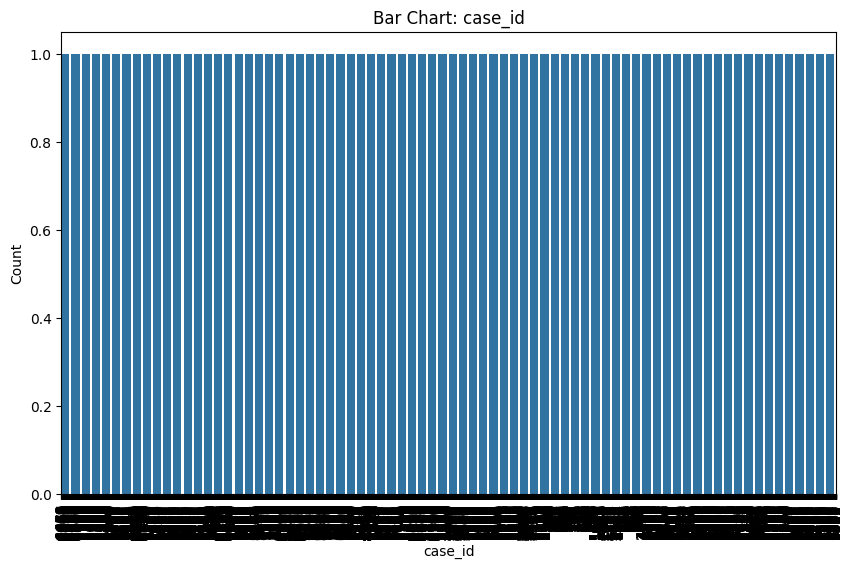

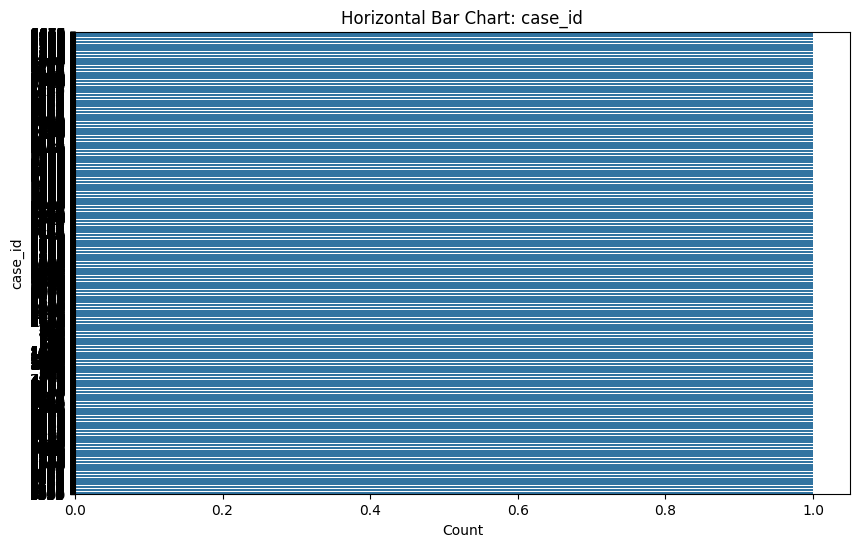

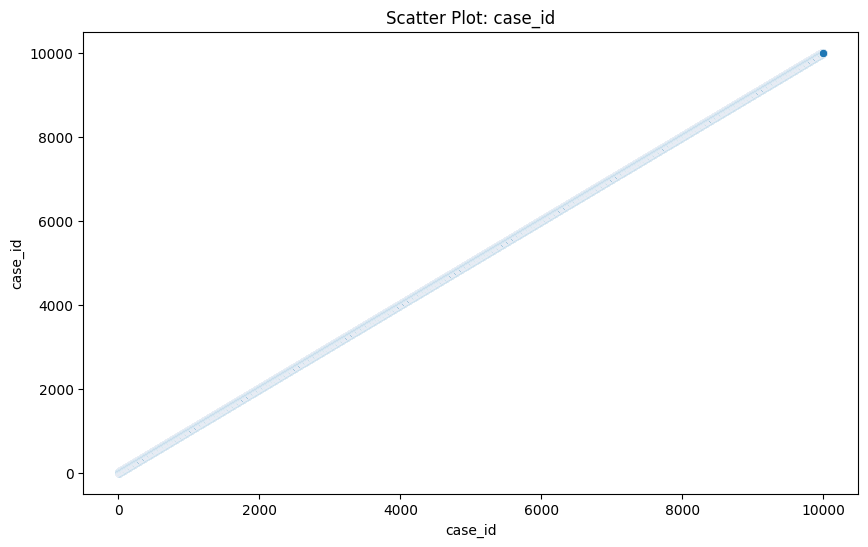

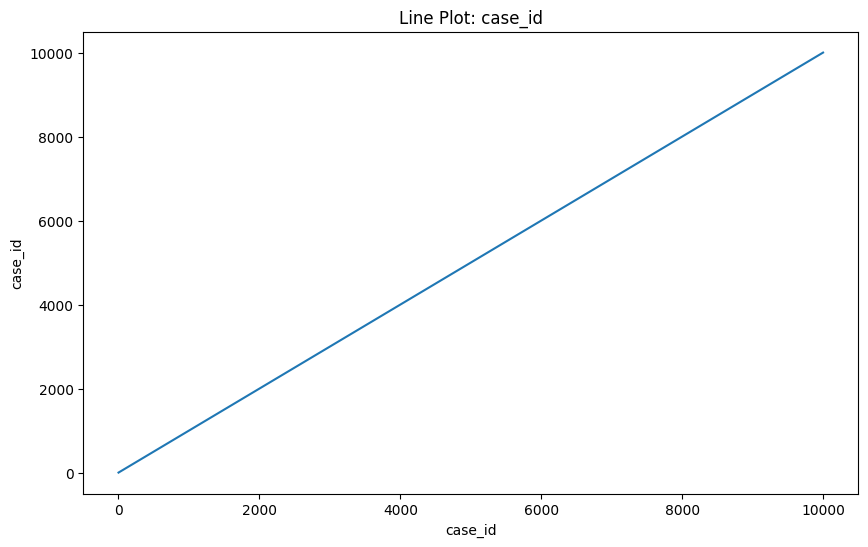

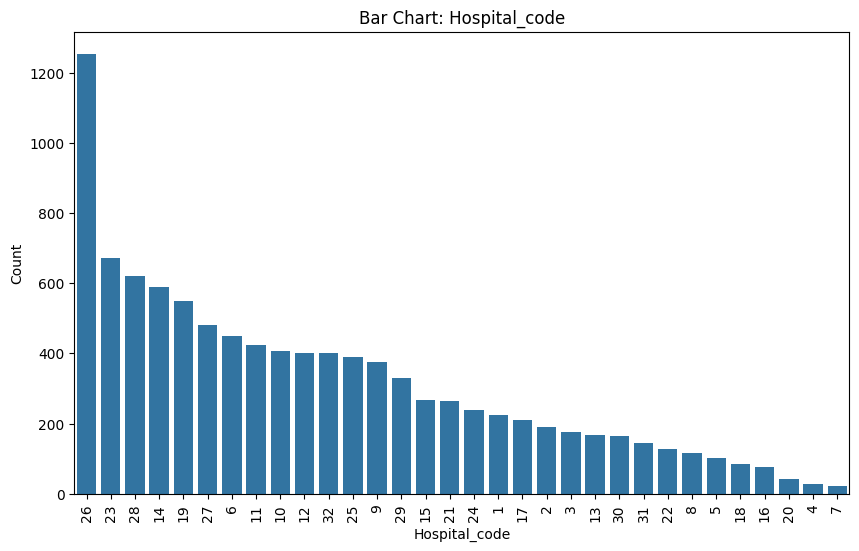

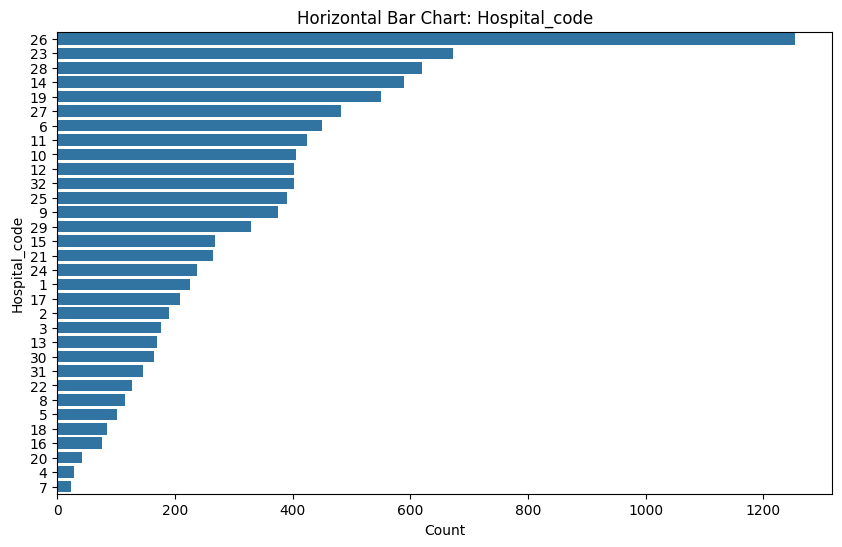

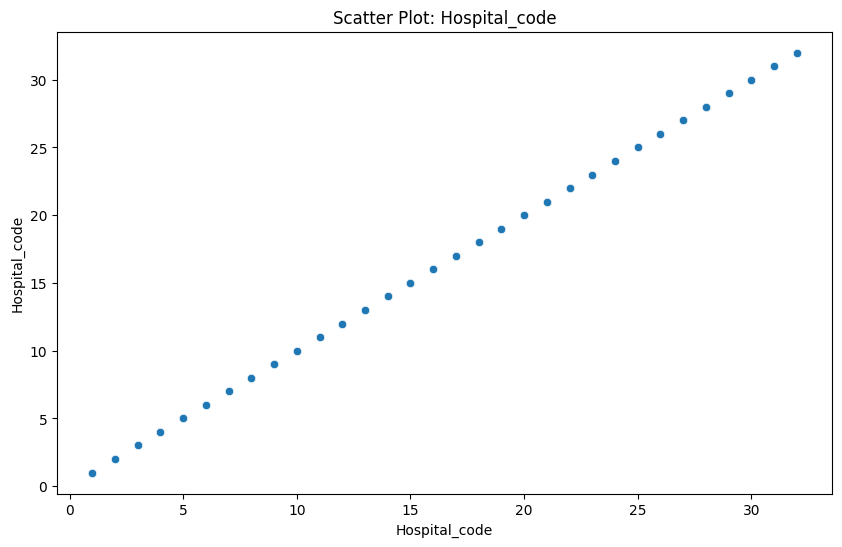

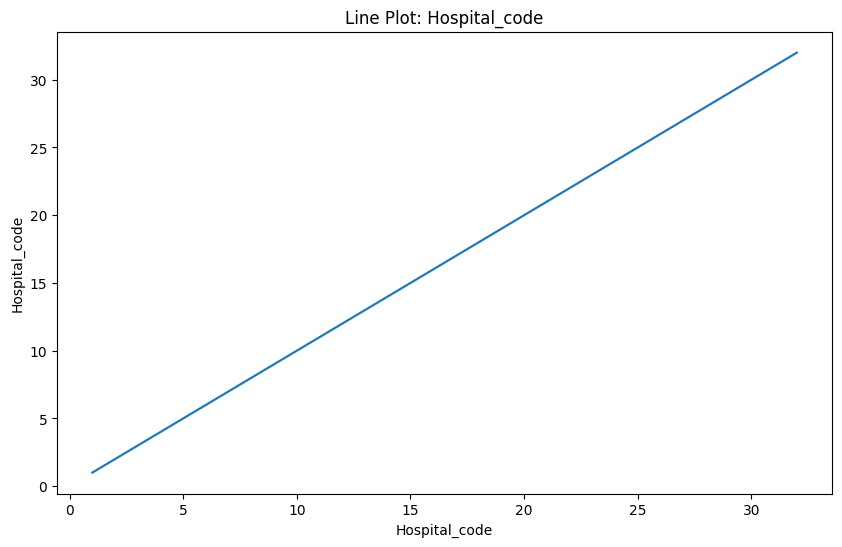

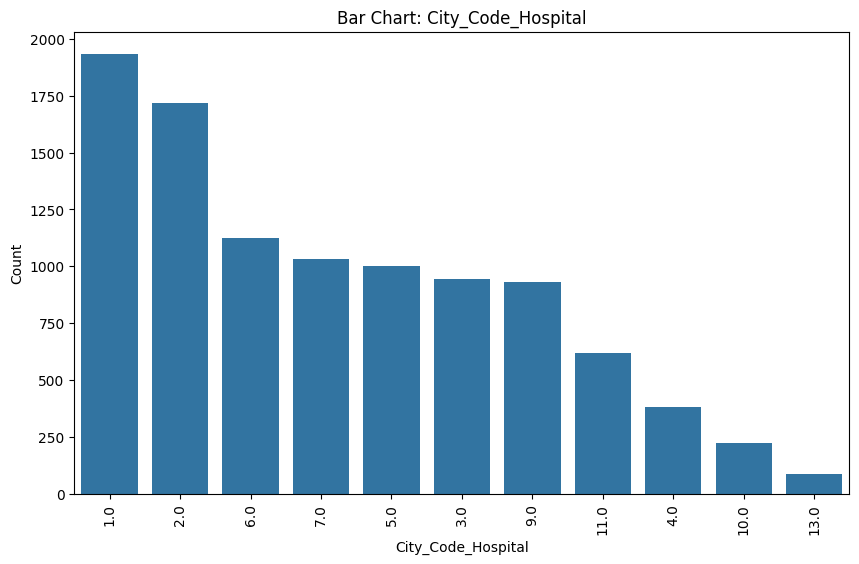

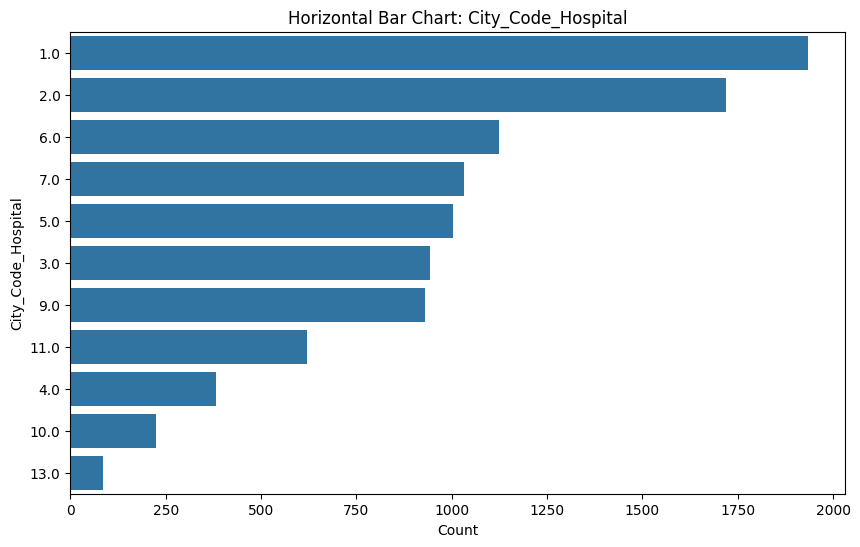

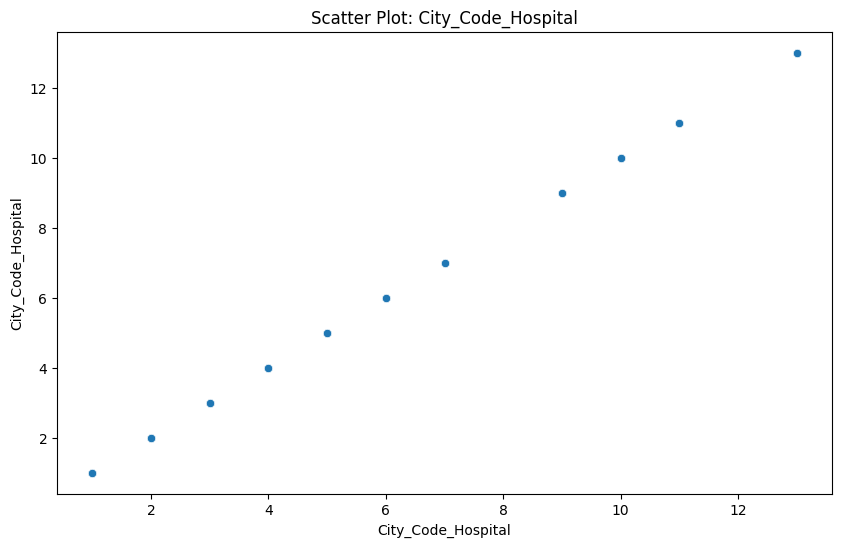

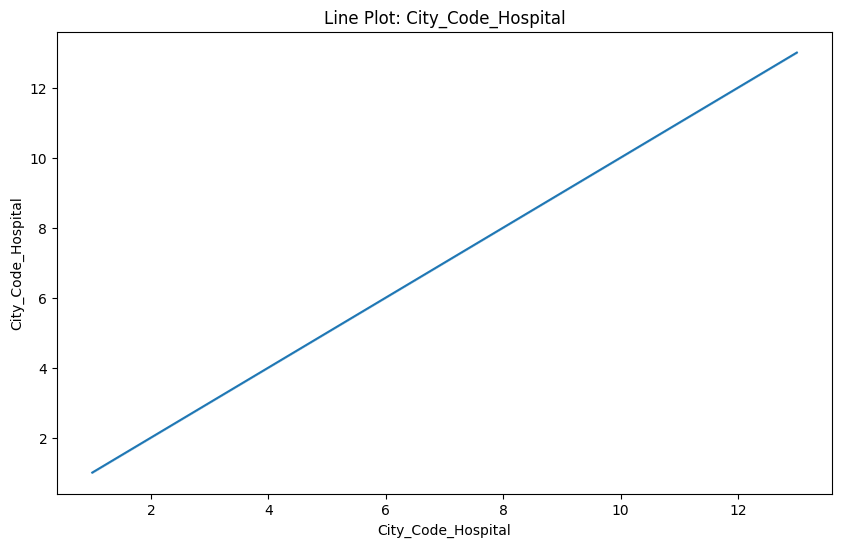

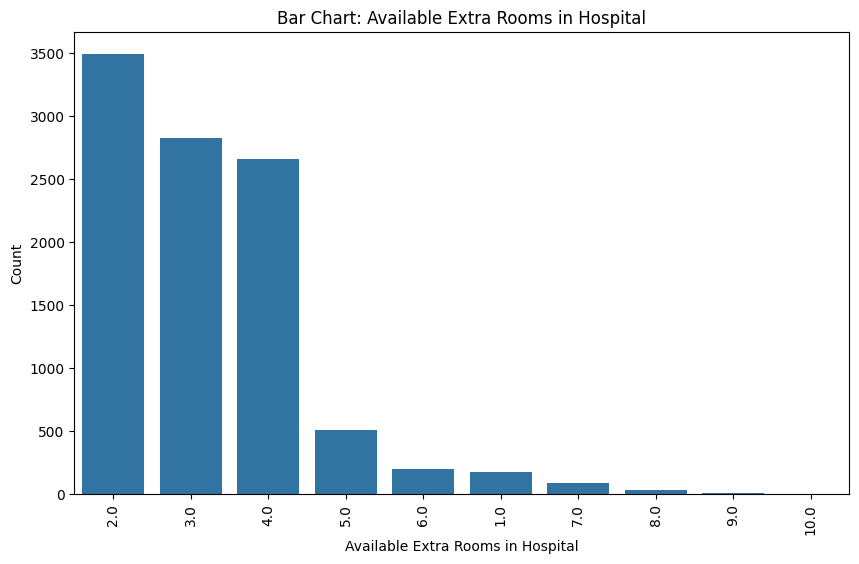

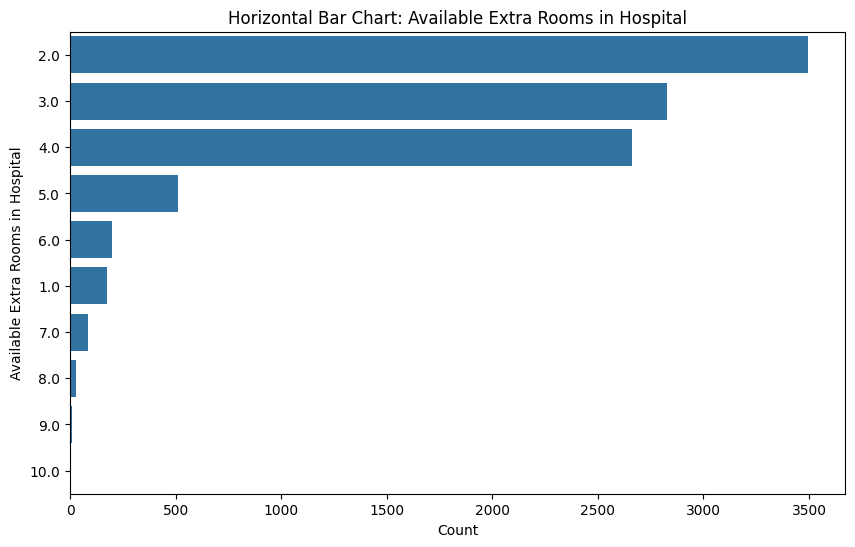

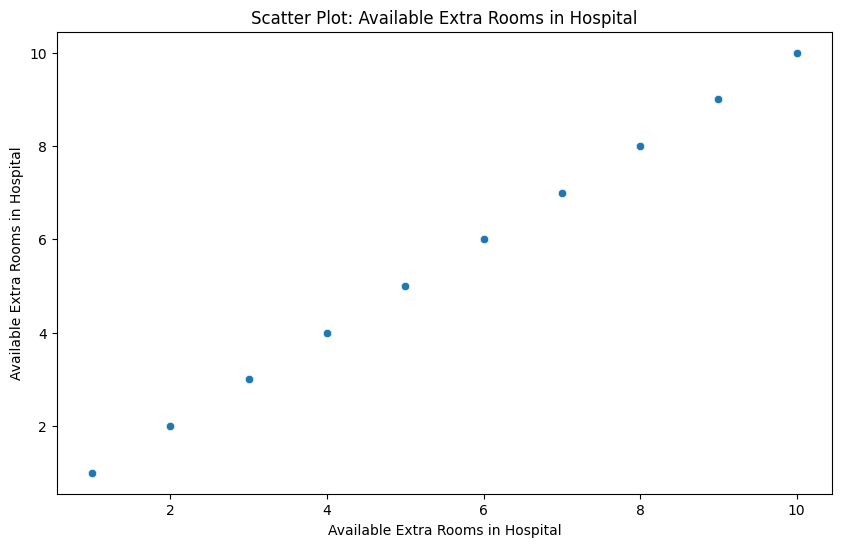

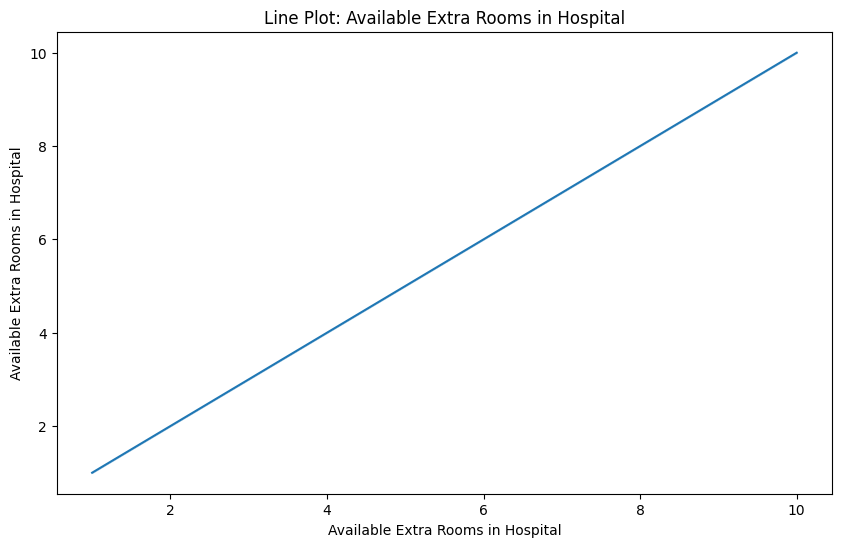

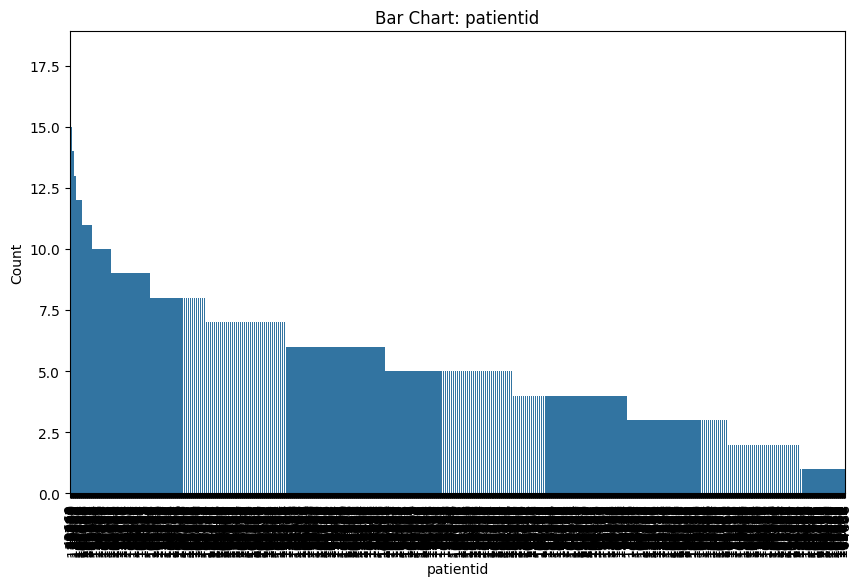

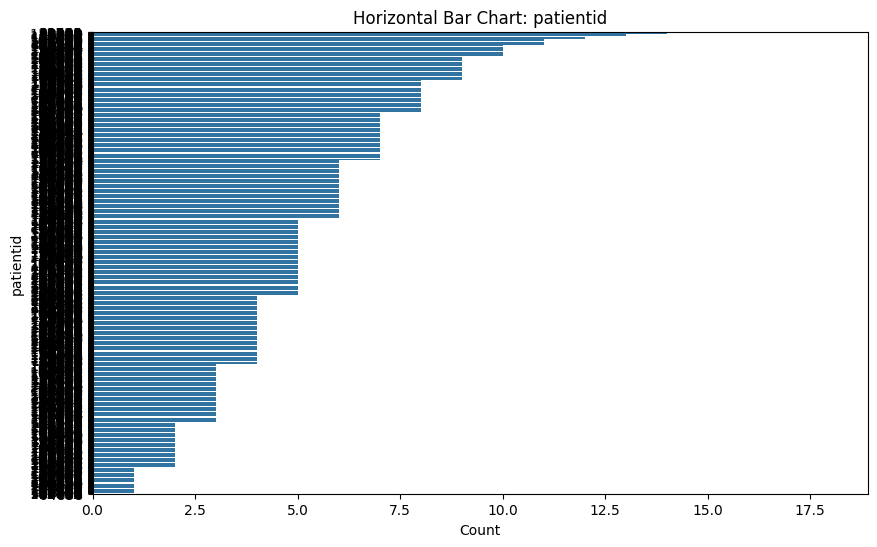

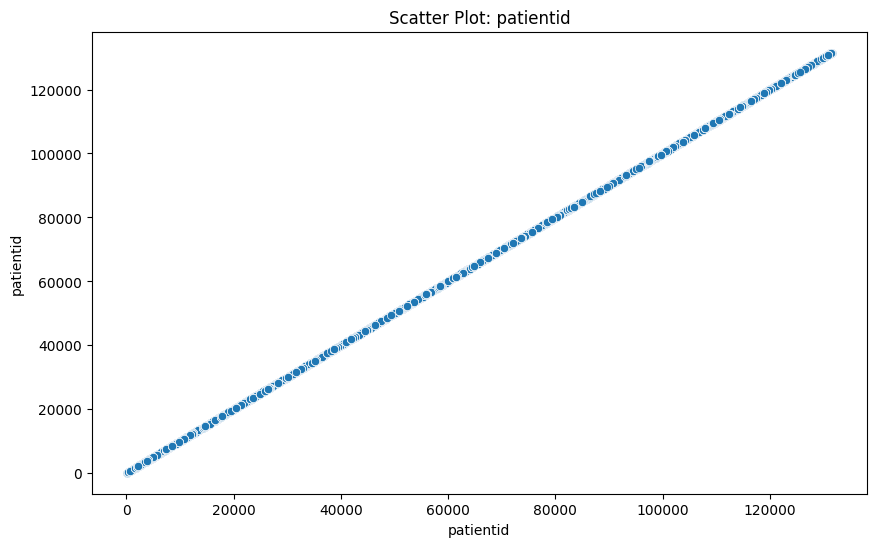

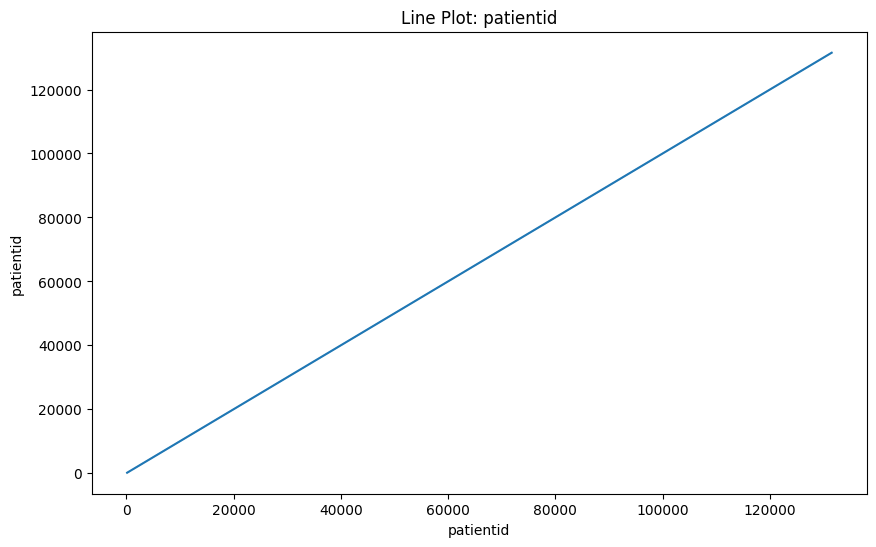

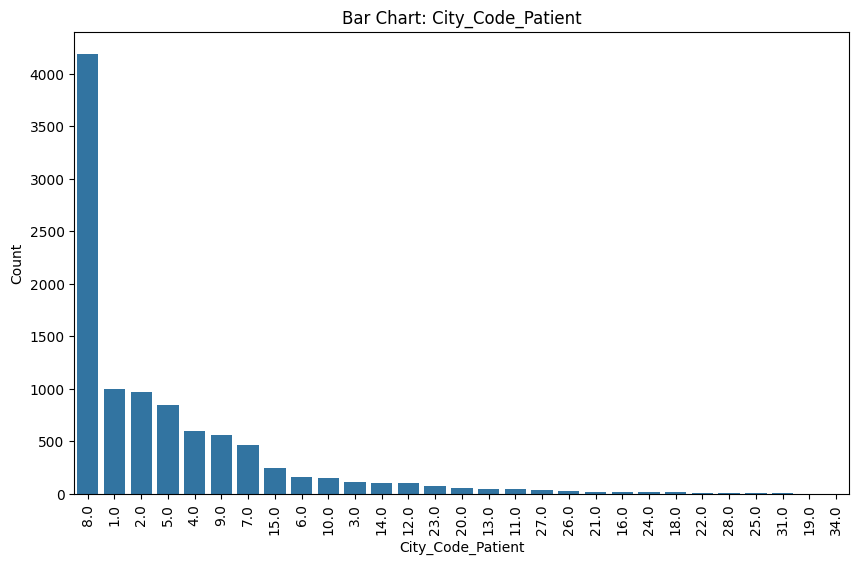

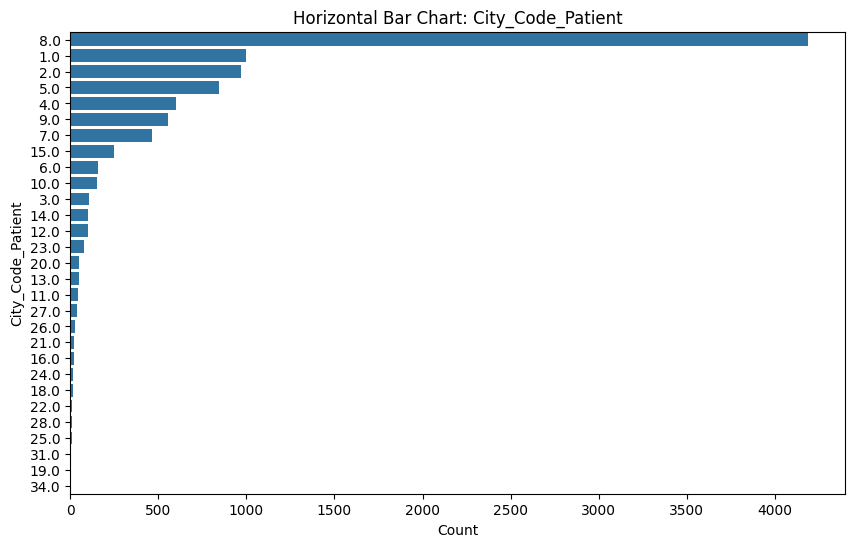

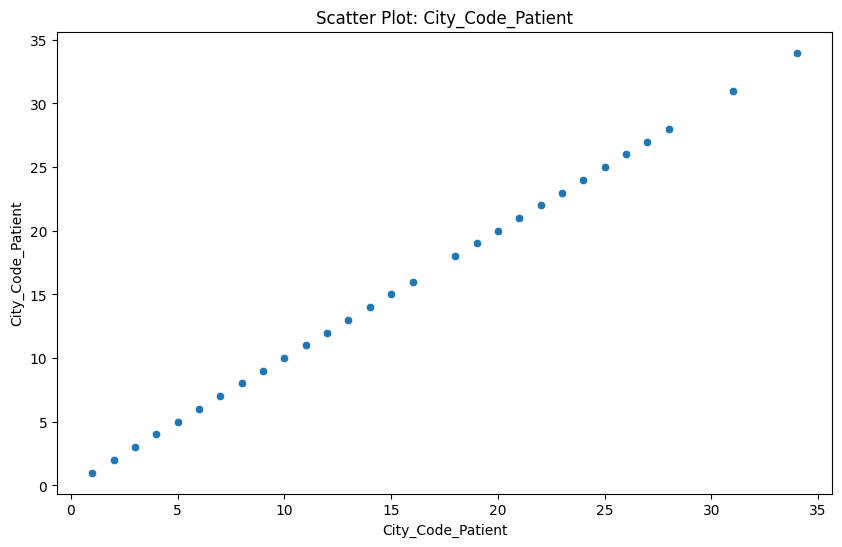

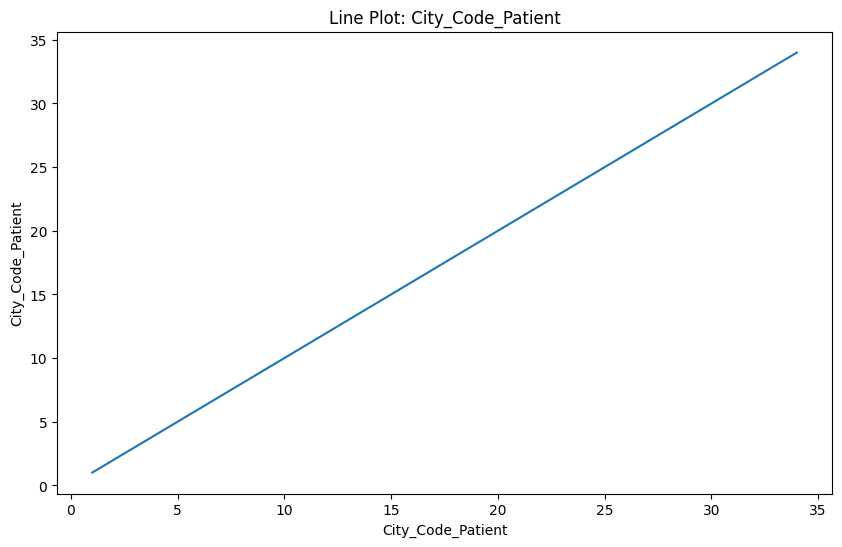

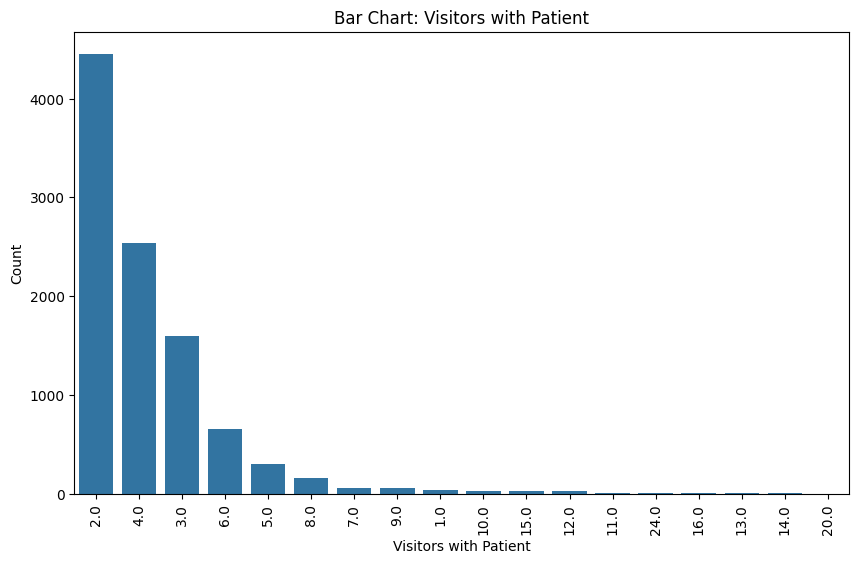

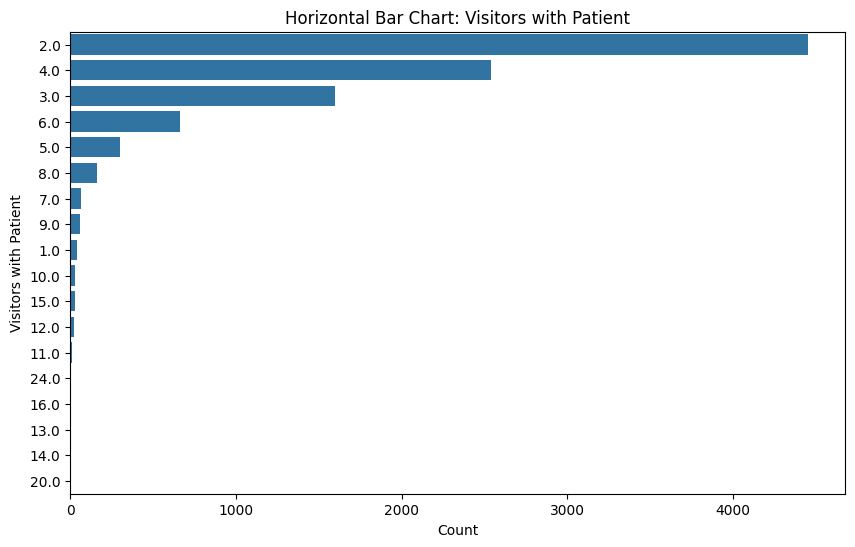

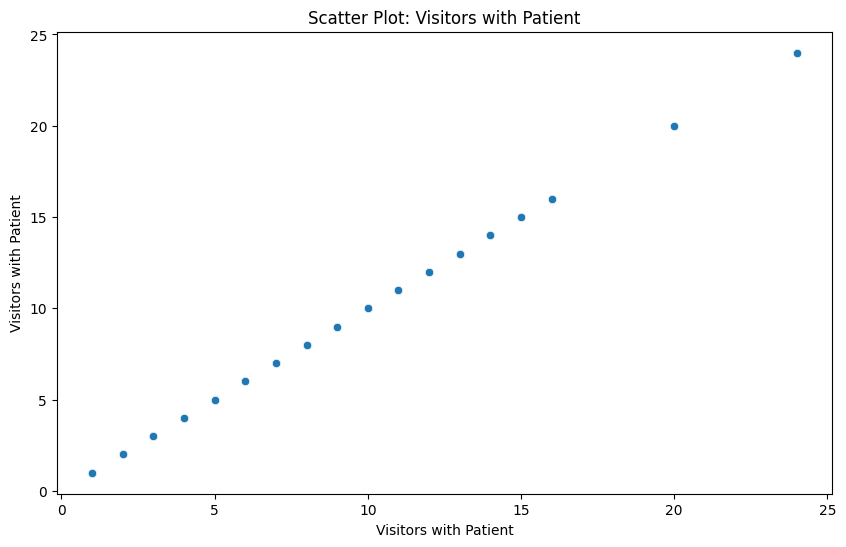

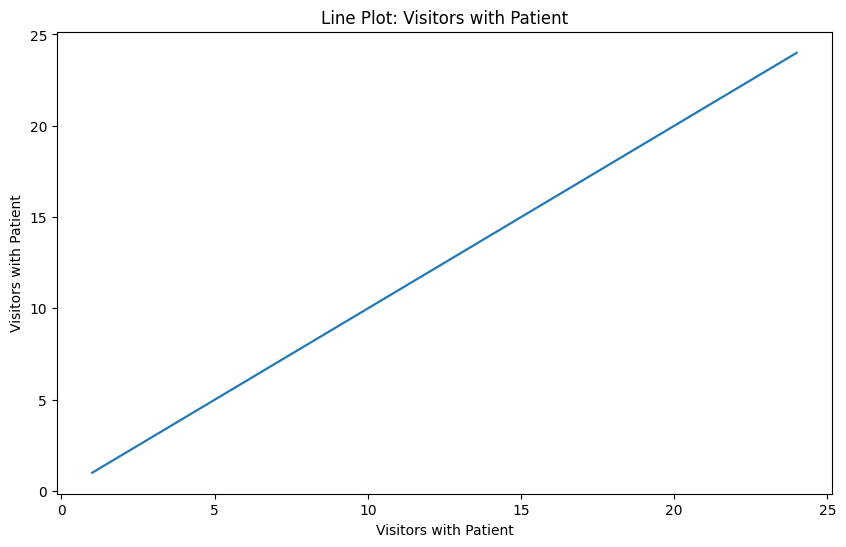

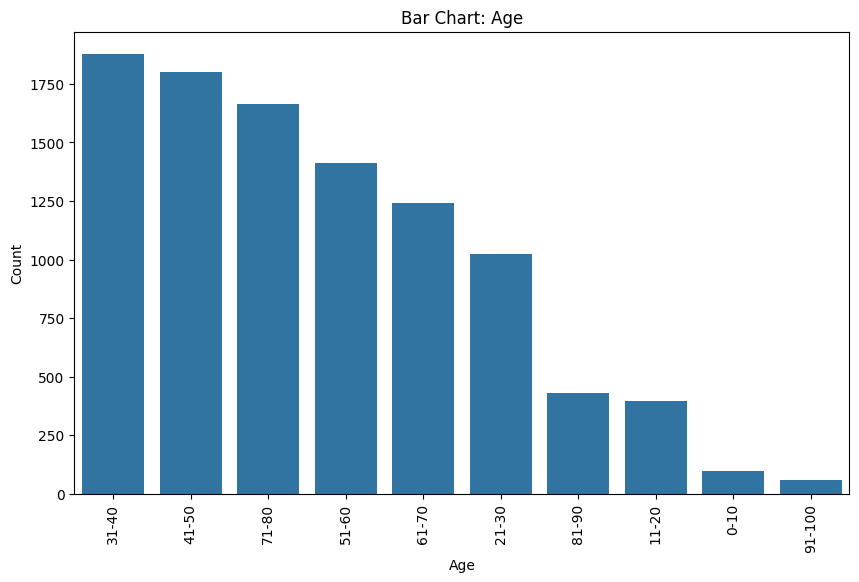

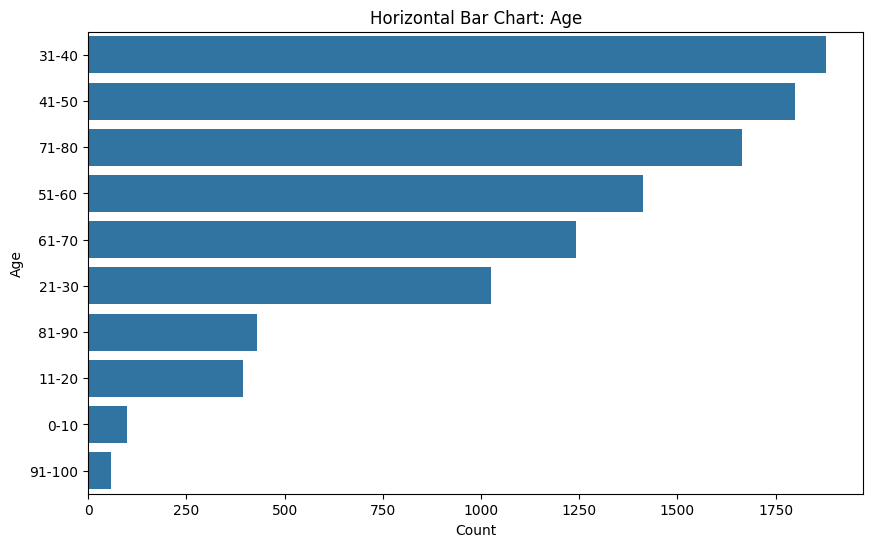

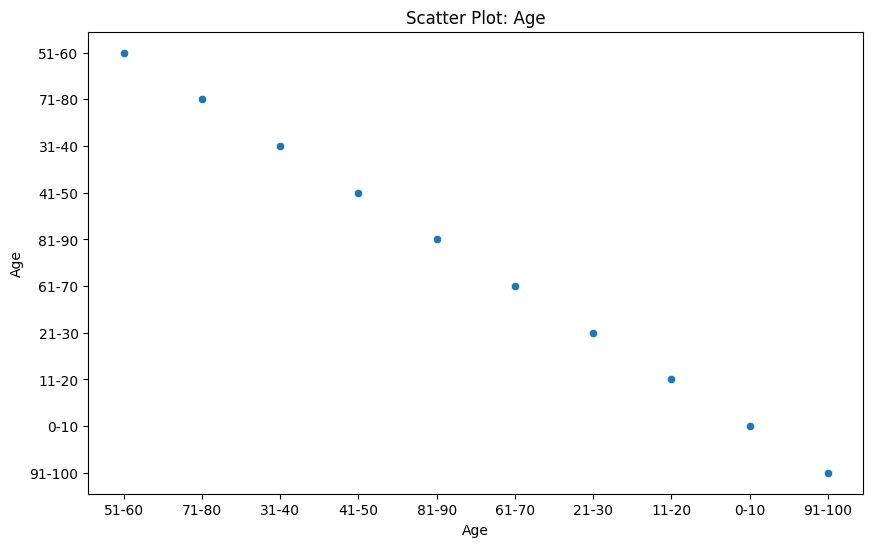

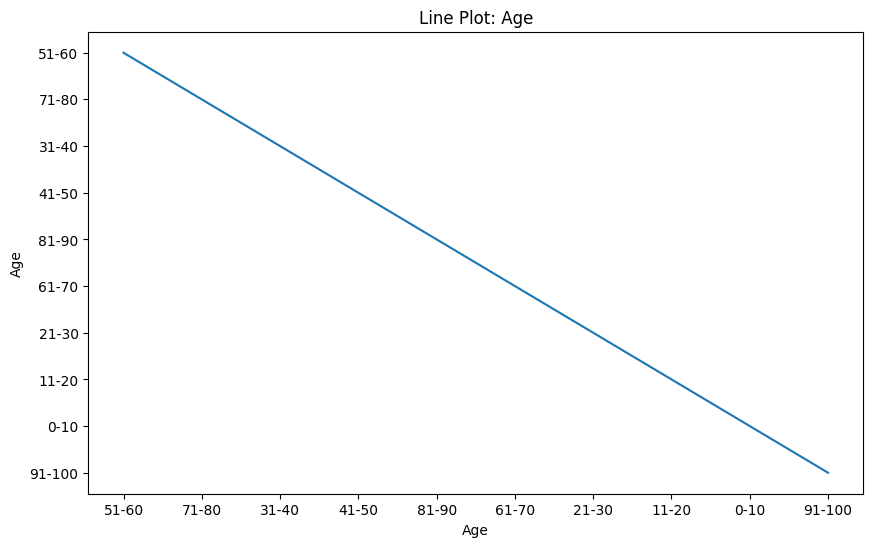

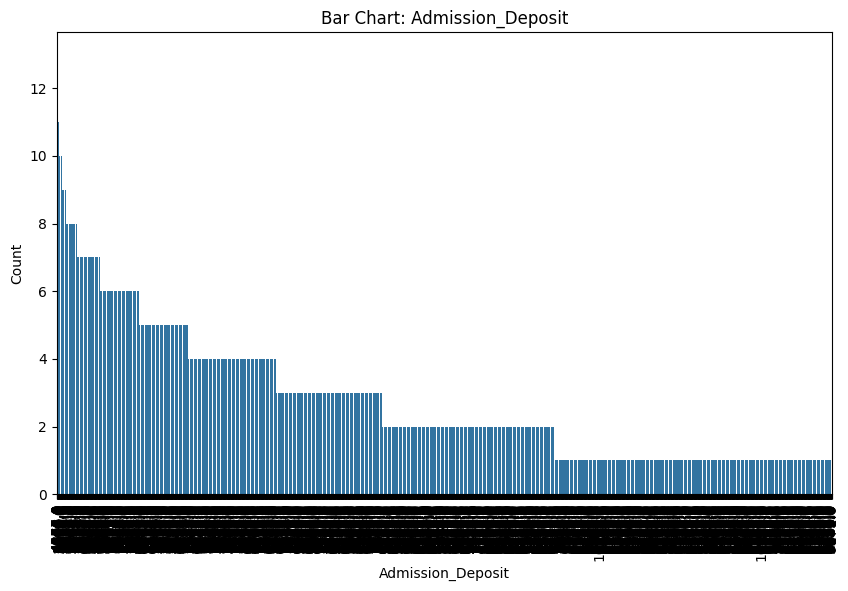

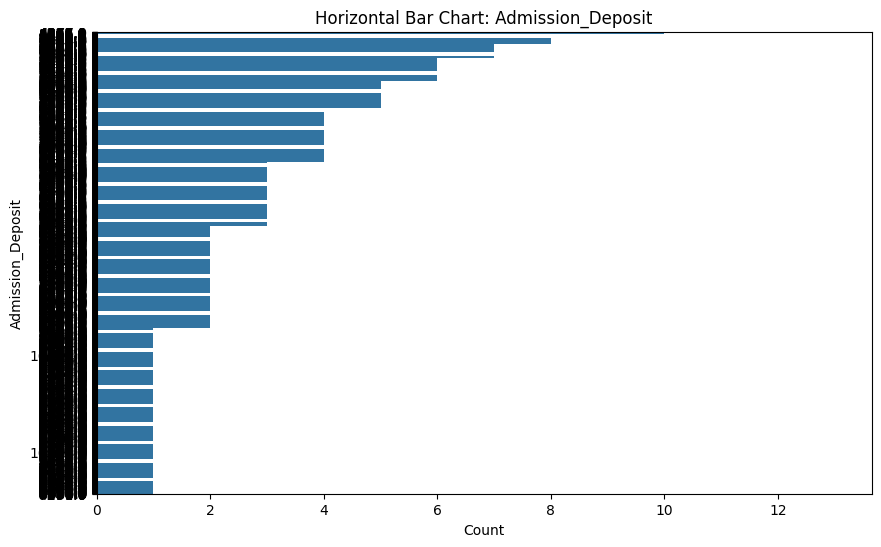

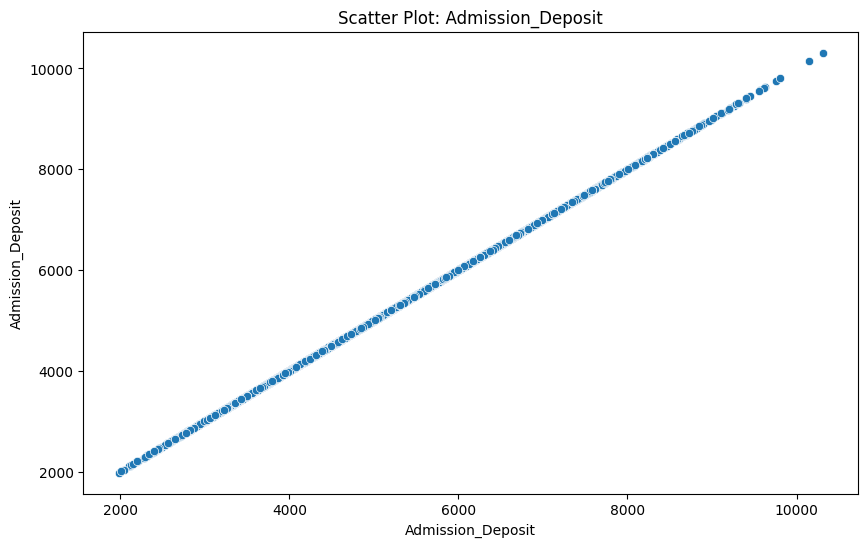

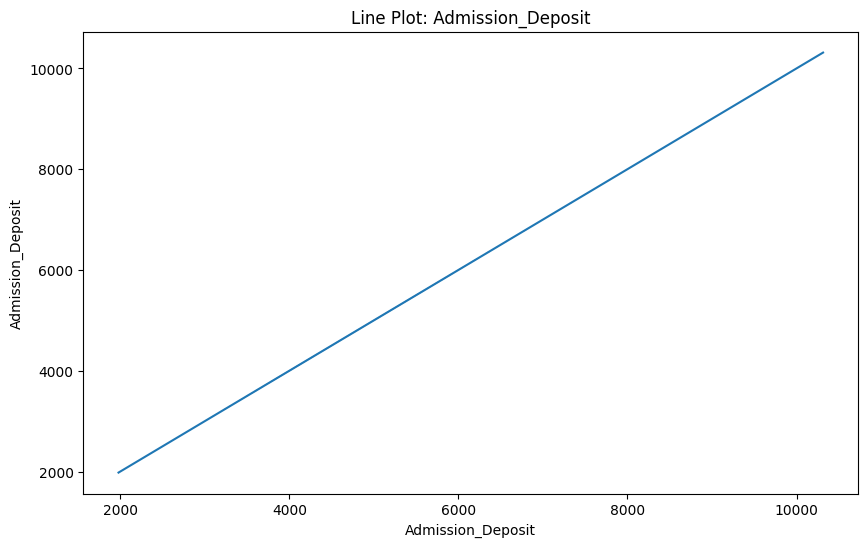

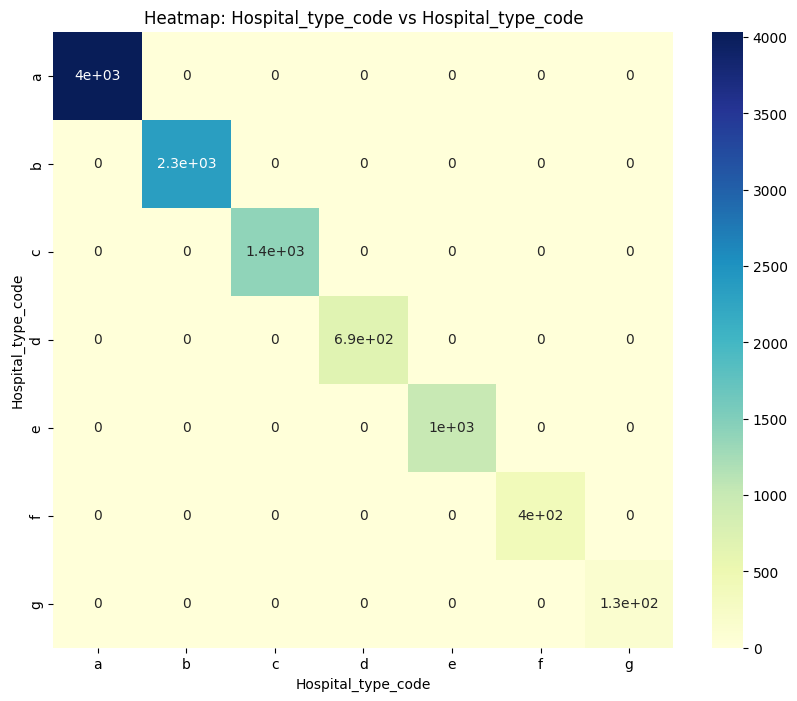

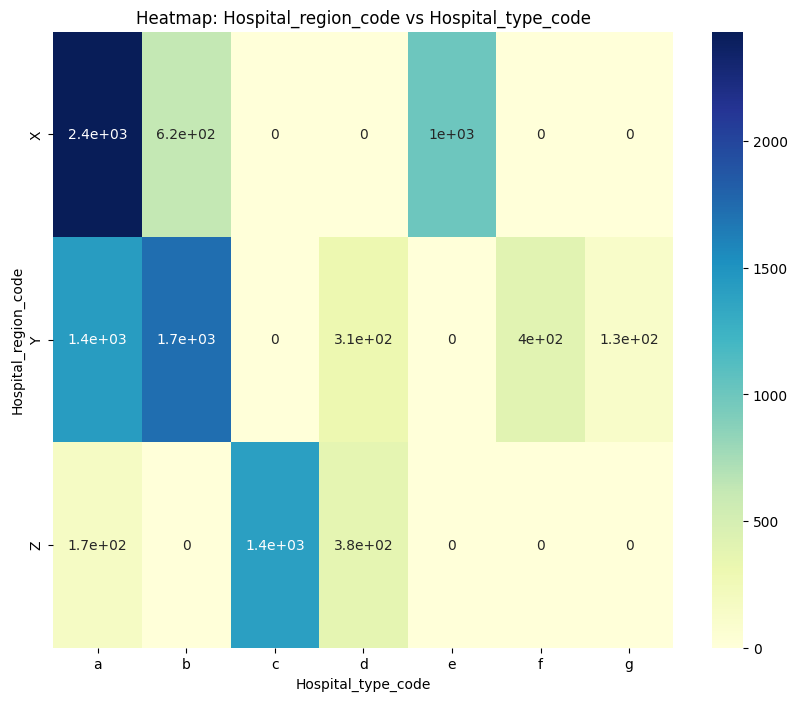

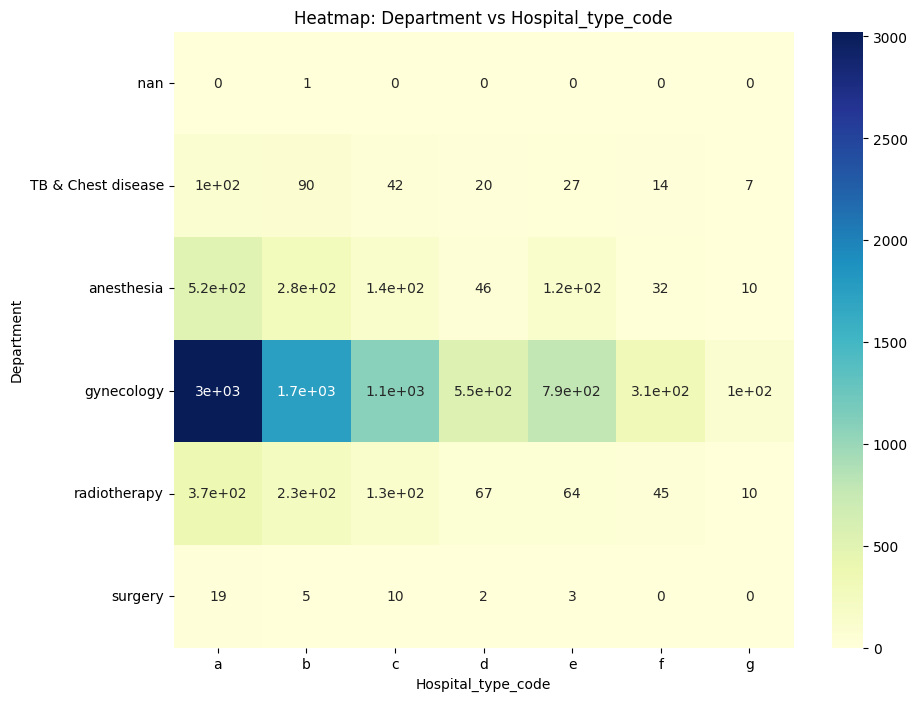

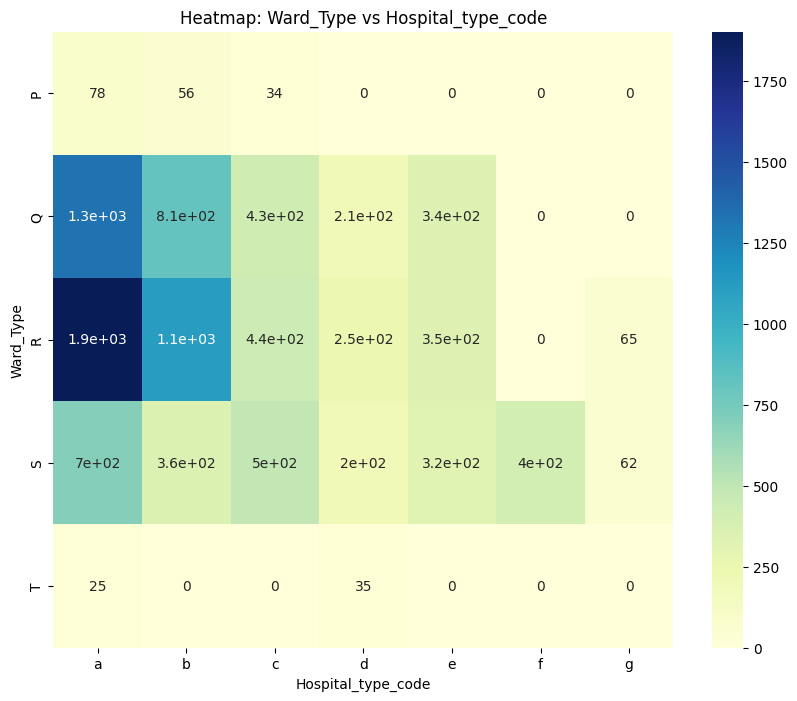

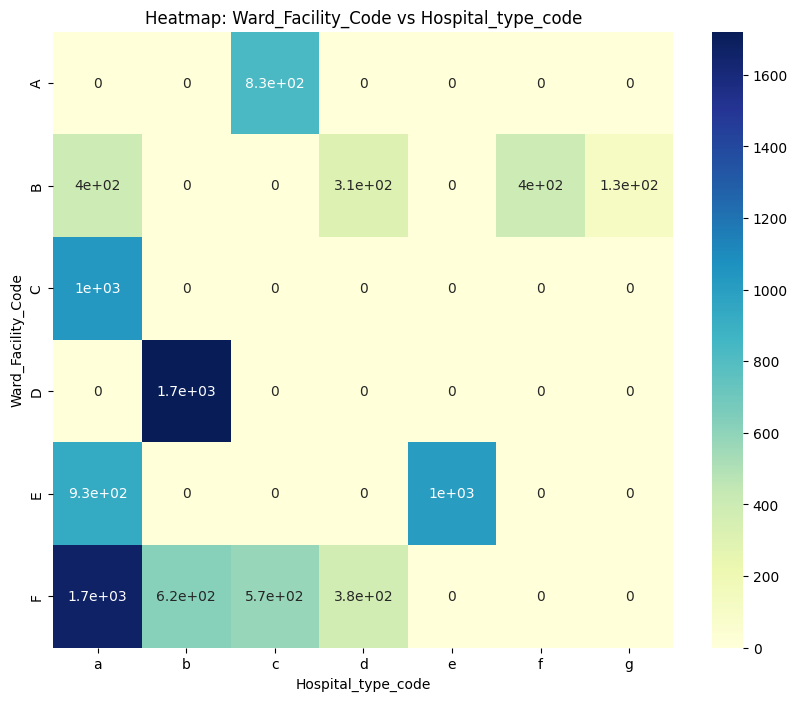

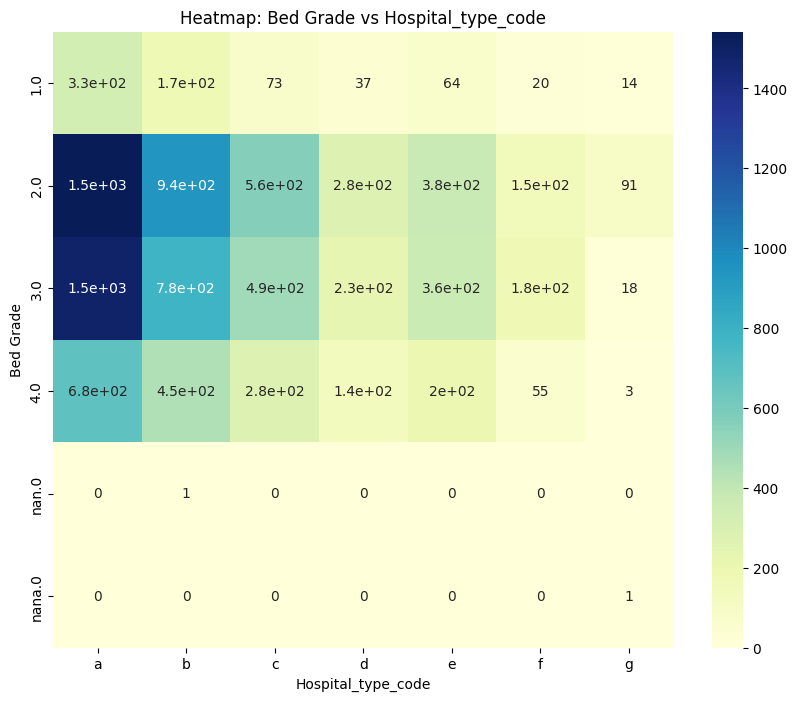

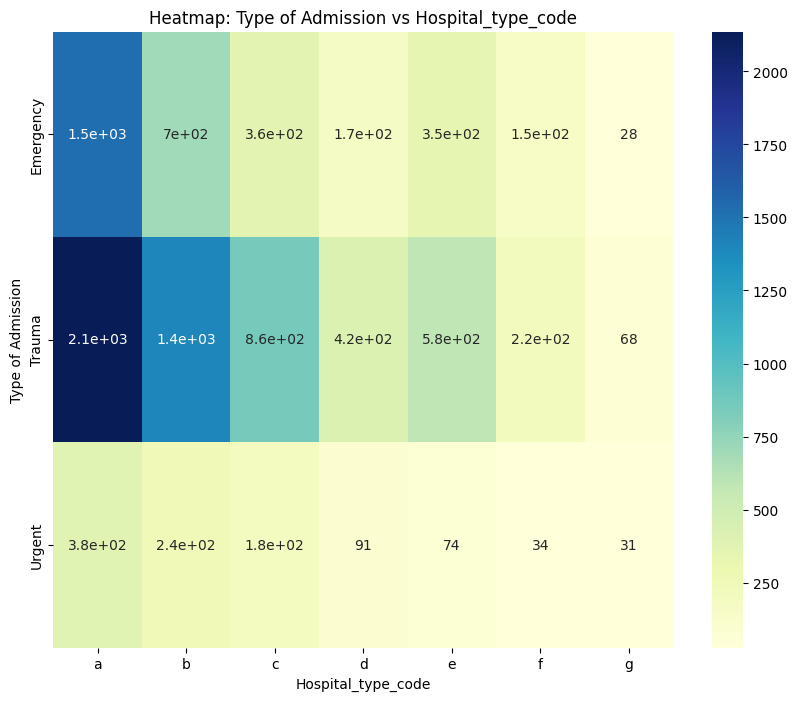

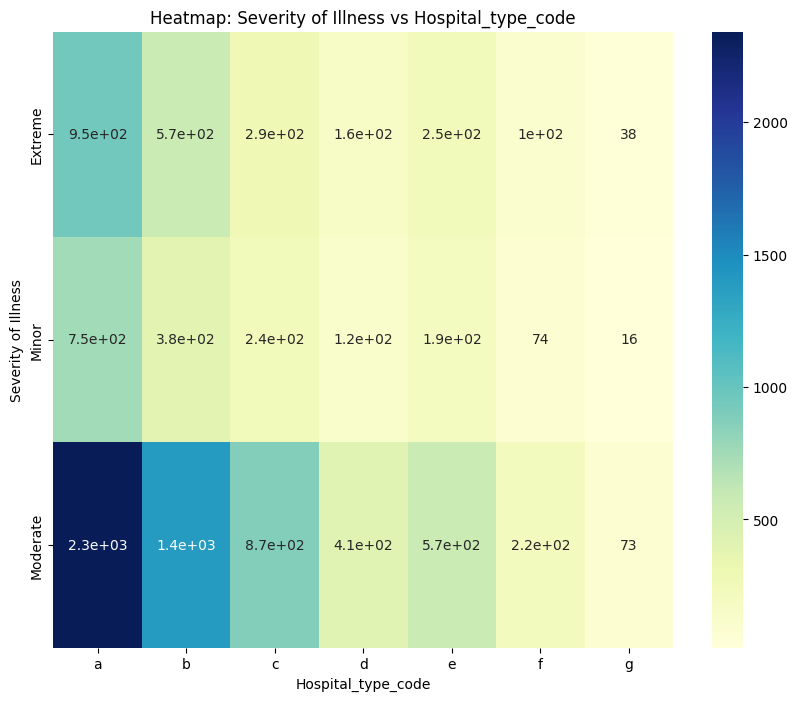

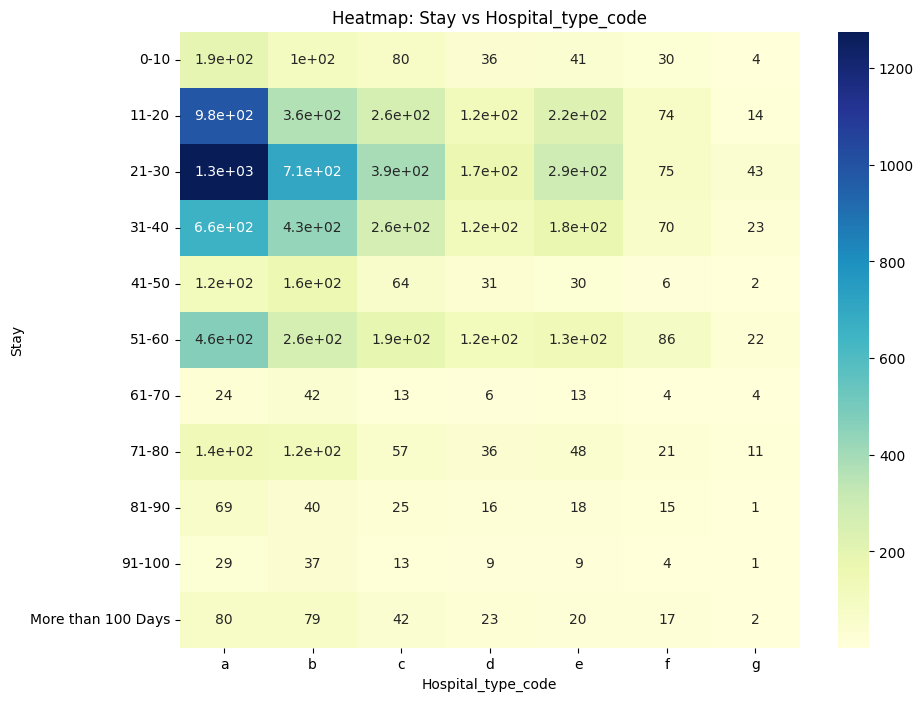

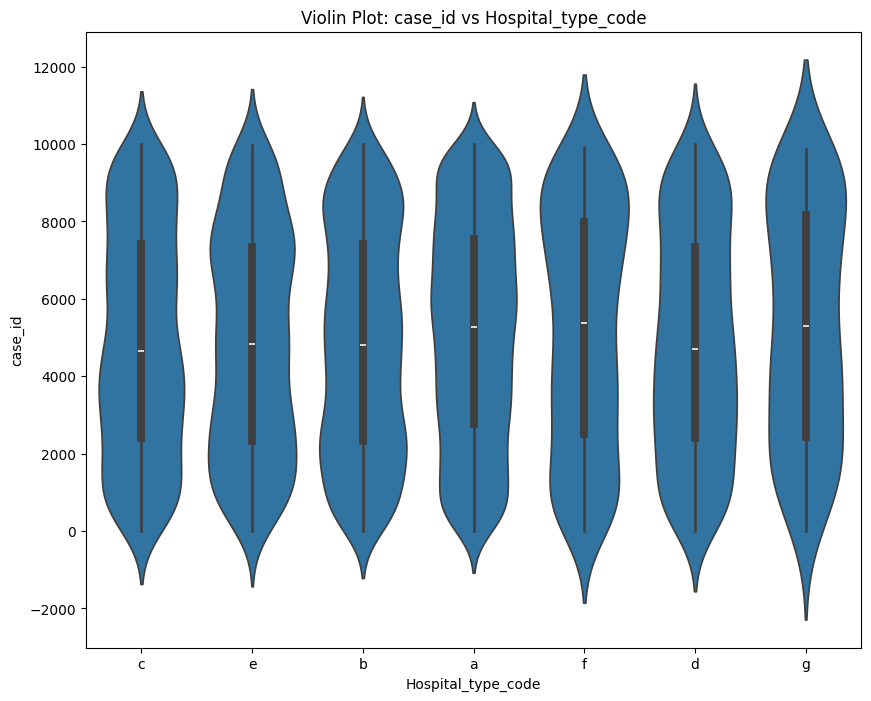

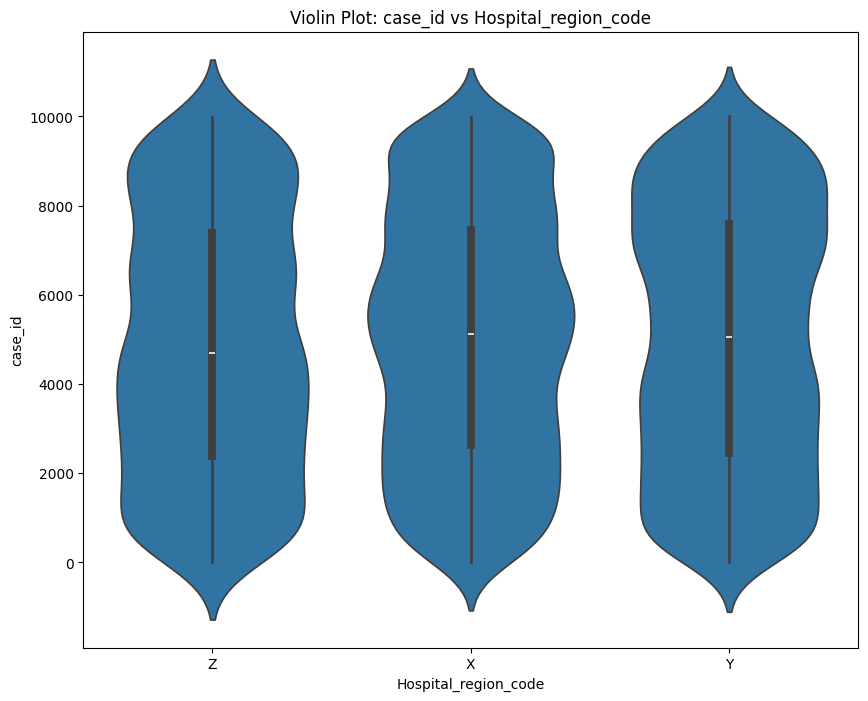

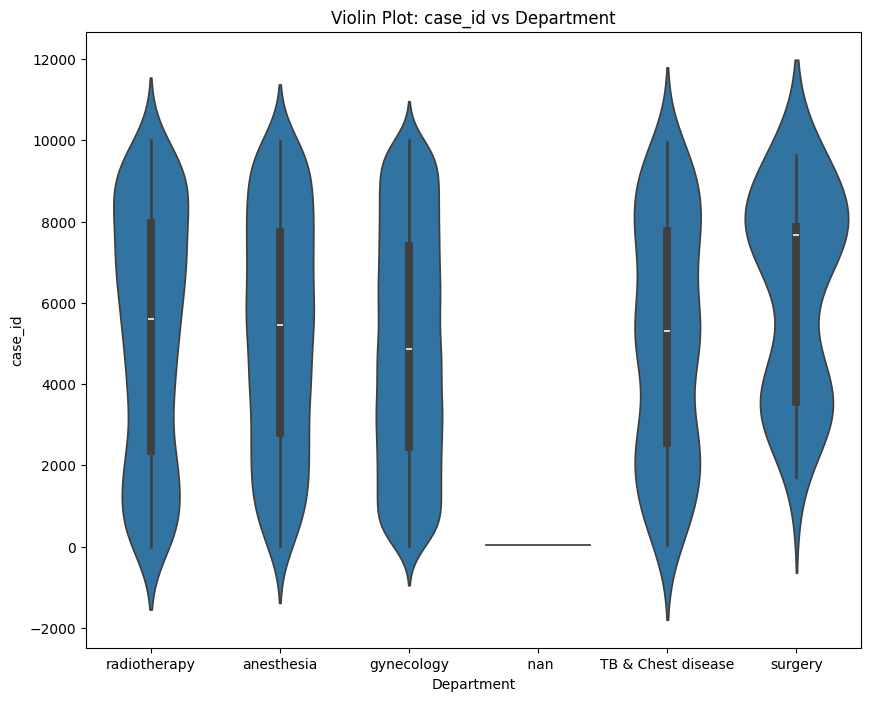

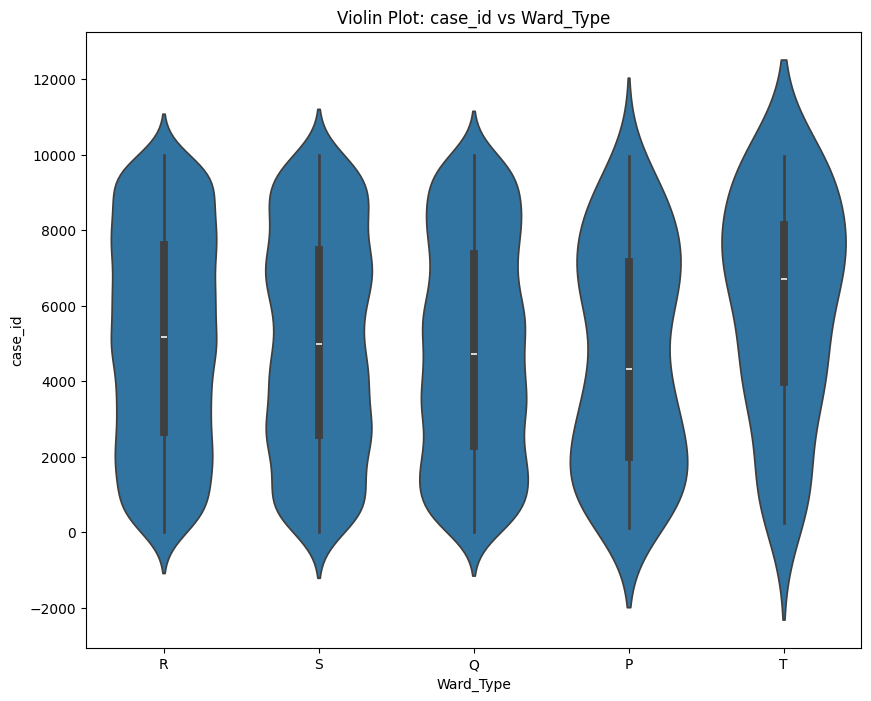

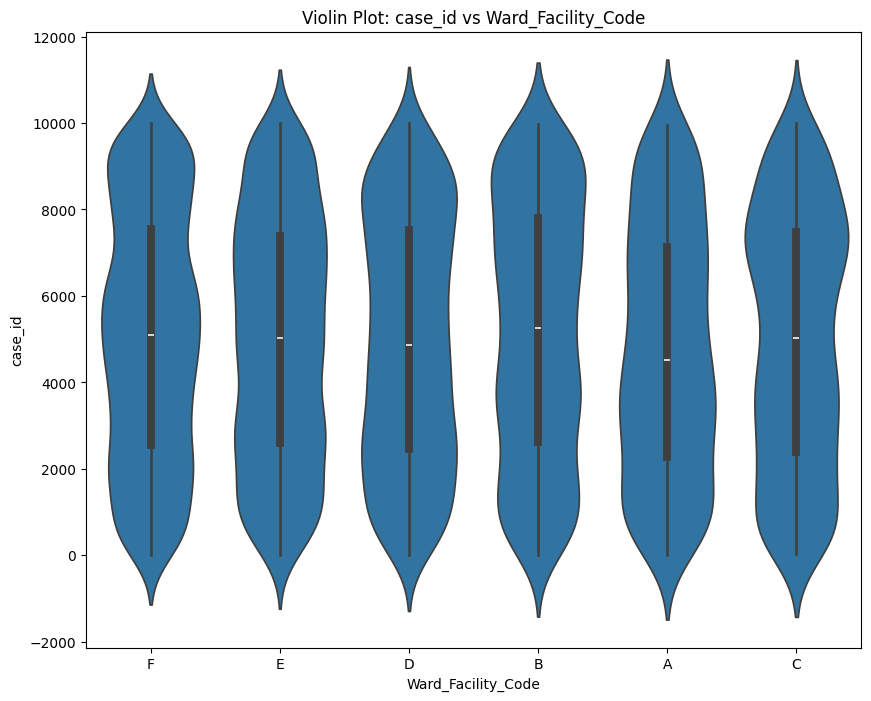

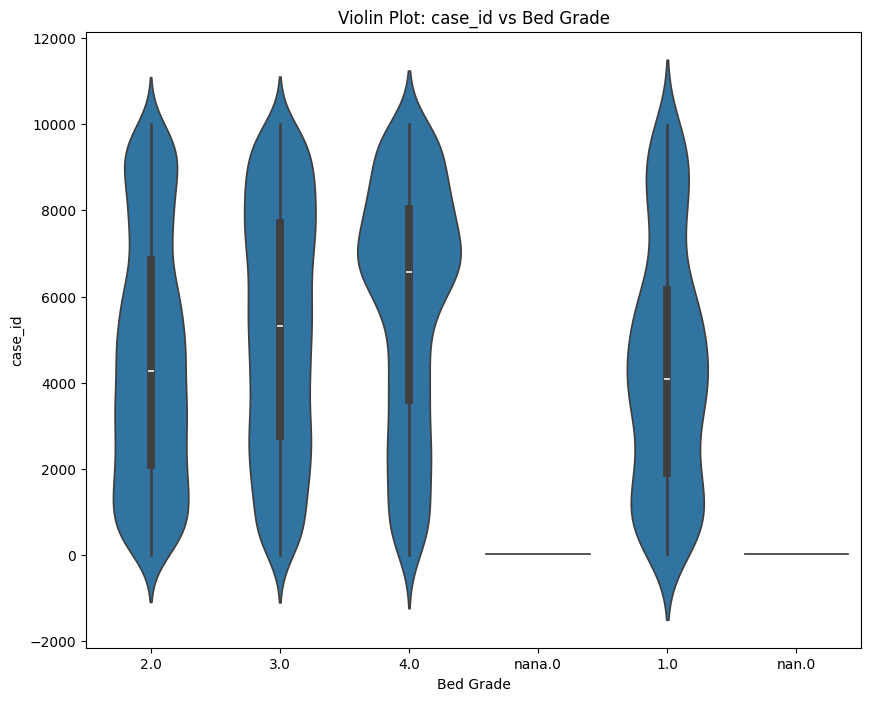

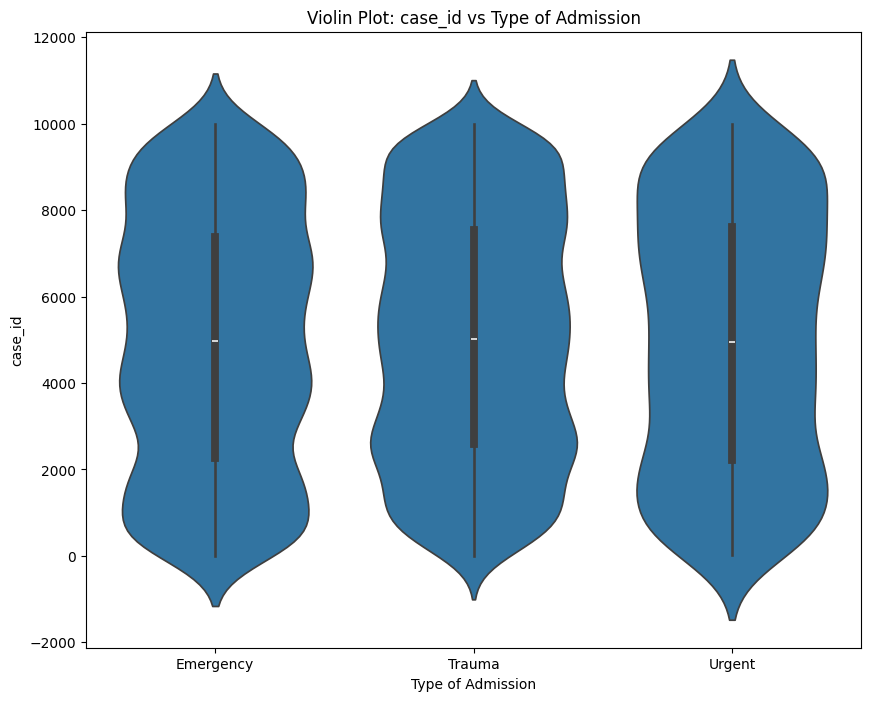

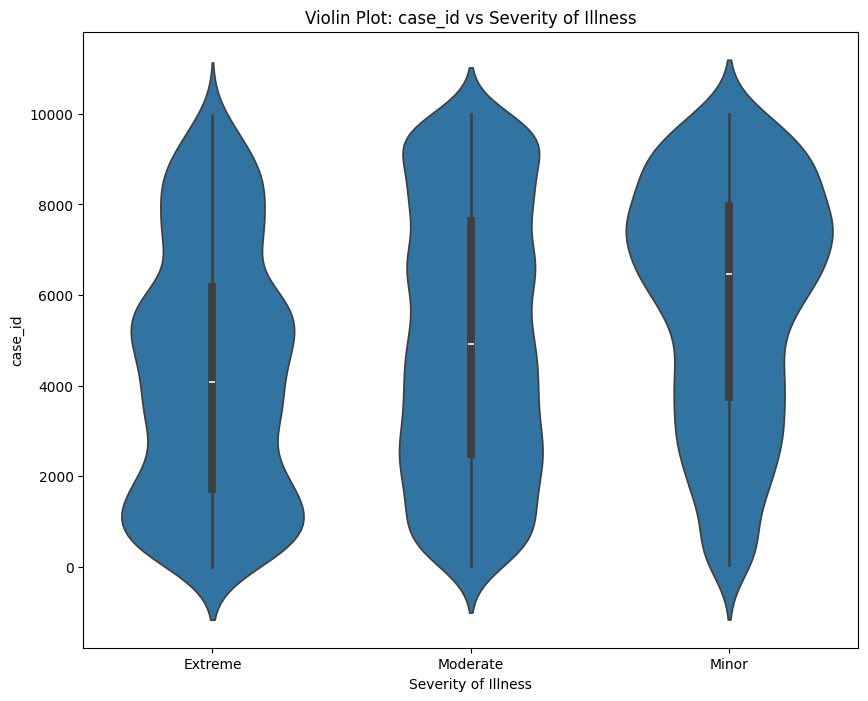

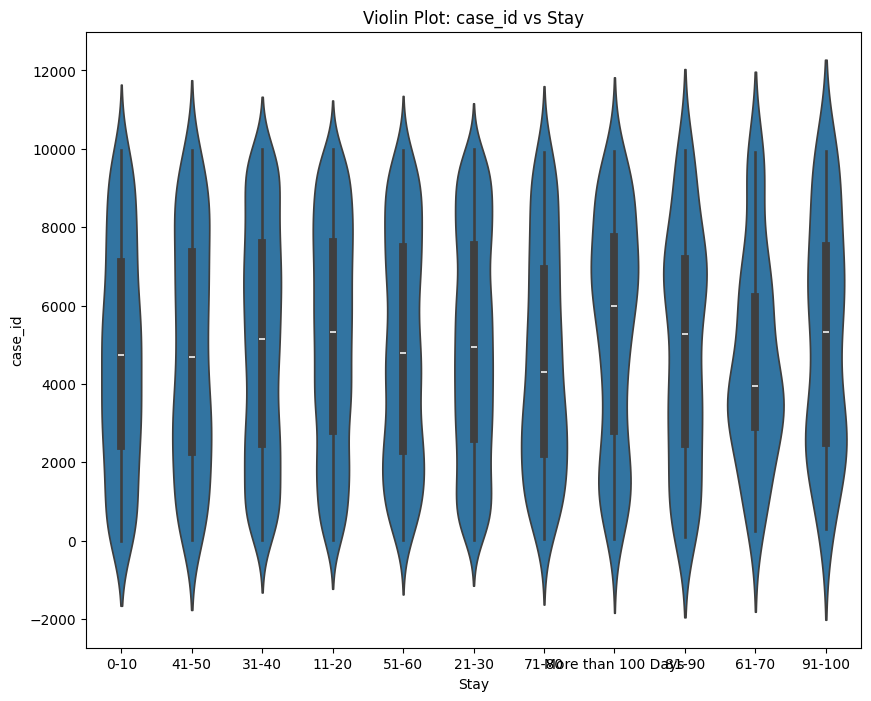

'\n# Generate a heatmap\nheatmap(data, "Heatmap of Correlation Matrix")\n\n# Generate a palette bar chart (replace \'column_name\' with actual column name)\npalette_bar_chart(data, \'replace_with_actual_column_name\', \'Bar Chart with Palette\', \'Category\', \'Count\', \'viridis\')\n\n# Generate a bar chart (replace \'column_name\' with actual column name)\nbar_chart(data, \'replace_with_actual_column_name\', \'Bar Chart\', \'Category\', \'Count\')\n\n# Generate a horizontal bar chart (replace \'column_name\' with actual column name)\nhbar_chart(data, \'replace_with_actual_column_name\', \'Horizontal Bar Chart\', \'Count\', \'Category\')\n\n# Generate a scatter plot (replace \'x_column\' and \'y_column\' with actual column names)\nscatter_plot(data, \'replace_with_actual_x_column\', \'replace_with_actual_y_column\', \'Scatter Plot\', \'X Axis\', \'Y Axis\')\n\n# Generate a line plot (replace \'x_column\' and \'y_column\' with actual column names)\nline_plot(data, \'replace_with_actual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import json

# Load data from CSV (original not cleaned)
data = pd.read_csv('/teamspace/studios/this_studio/sample-synthetic-healthcare.csv')

# Load classifications from JSON file (replace with your actual JSON file path)
classifications_file_path = '/teamspace/studios/this_studio/csvandmetadata export /json/claasification_555.json'
with open(classifications_file_path, 'r') as f:
    classifications = json.load(f)

numeric_columns = classifications['Numeric Data']
categorical_columns = classifications['Categorical Data']

def bar_chart(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

def hbar_chart(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def scatter_plot(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def line_plot(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def heatmap(data, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

def palette_bar_chart(data, column, title, xlabel, ylabel, palette):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

def numeric_bar_charts(data, numeric_columns):
    for col in numeric_columns:
        bar_chart(data, col, f"Bar Chart: {col}", col, "Count")
        hbar_chart(data, col, f"Horizontal Bar Chart: {col}", "Count", col)
        scatter_plot(data, col, col, f"Scatter Plot: {col}", col, col)
        line_plot(data, col, col, f"Line Plot: {col}", col, col)

def categorical_charts(data, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(10, 8))
        sns.heatmap(pd.crosstab(data[col], data[categorical_columns[0]]), annot=True, cmap="YlGnBu")
        plt.title(f"Heatmap: {col} vs {categorical_columns[0]}")
        plt.xlabel(categorical_columns[0])
        plt.ylabel(col)
        plt.show()
        
def mixed_chart(data, numeric_columns, categorical_columns):
    num_col = numeric_columns[0]  # Take the first numeric column
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 8))
        sns.violinplot(x=cat_col, y=num_col, data=data)
        plt.title(f"Violin Plot: {num_col} vs {cat_col}")
        plt.show()

# Generate numeric bar charts
numeric_bar_charts(data, numeric_columns)

# Generate categorical charts
categorical_charts(data, categorical_columns)

# Generate mixed chart
mixed_chart(data, numeric_columns, categorical_columns)
'''
# Generate a heatmap
heatmap(data, "Heatmap of Correlation Matrix")

# Generate a palette bar chart (replace 'column_name' with actual column name)
palette_bar_chart(data, 'replace_with_actual_column_name', 'Bar Chart with Palette', 'Category', 'Count', 'viridis')

# Generate a bar chart (replace 'column_name' with actual column name)
bar_chart(data, 'replace_with_actual_column_name', 'Bar Chart', 'Category', 'Count')

# Generate a horizontal bar chart (replace 'column_name' with actual column name)
hbar_chart(data, 'replace_with_actual_column_name', 'Horizontal Bar Chart', 'Count', 'Category')

# Generate a scatter plot (replace 'x_column' and 'y_column' with actual column names)
scatter_plot(data, 'replace_with_actual_x_column', 'replace_with_actual_y_column', 'Scatter Plot', 'X Axis', 'Y Axis')

# Generate a line plot (replace 'x_column' and 'y_column' with actual column names)
line_plot(data, 'replace_with_actual_x_column', 'replace_with_actual_y_column', 'Line Plot', 'X Axis', 'Y Axis')
'''


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import json

# Load data from CSV (original not cleaned)
data = pd.read_csv('sample-synthetic-healthcare.csv')

# Load classifications from JSON file (replace with your actual JSON file path)
classifications_file_path = '/teamspace/studios/this_studio/csvandmetadata export/json/claasification_555.json'
with open(classifications_file_path, 'r') as f:
    classifications = json.load(f)

numeric_columns = classifications['Numeric Data']
categorical_columns = classifications['Categorical Data']

# Check for non-numeric values in numeric columns
for col in numeric_columns:
    if not pd.api.types.is_numeric_dtype(data[col]):
        print(f"Non-numeric values found in column {col}:")
        print(data[col].unique())

# Convert non-numeric values to NaN and then handle them
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in numeric columns
data = data.dropna(subset=numeric_columns)

def bar_chart(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

def hbar_chart(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=data, order=data[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def scatter_plot(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def line_plot(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def heatmap(data, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()

def palette_bar_chart(data, column, title, xlabel, ylabel, palette):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

def numeric_charts(data, numeric_columns):
    for col in numeric_columns:
        bar_chart(data, col, f"Bar Chart: {col}", col, "Count")
        hbar_chart(data, col, f"Horizontal Bar Chart: {col}", "Count", col)
        scatter_plot(data, col, col, f"Scatter Plot: {col}", col, col)
        line_plot(data, col, col, f"Line Plot: {col}", col, col)

def categorical_charts(data, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(10, 8))
        sns.heatmap(pd.crosstab(data[col], data[categorical_columns[0]]), annot=True, cmap="YlGnBu")
        plt.title(f"Heatmap: {col} vs {categorical_columns[0]}")
        plt.xlabel(categorical_columns[0])
        plt.ylabel(col)
        plt.show()
        
def mixed_chart(data, numeric_columns, categorical_columns):
    num_col = numeric_columns[0]  # Take the first numeric column
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 8))
        sns.violinplot(x=cat_col, y=num_col, data=data)
        plt.title(f"Violin Plot: {num_col} vs {cat_col}")
        plt.show()

# Generate numeric charts
numeric_charts(data, numeric_columns)

# Generate categorical charts
categorical_charts(data, categorical_columns)

# Generate mixed chart
mixed_chart(data, numeric_columns, categorical_columns)

# Generate a heatmap
heatmap(data, "Heatmap of Correlation Matrix")

# Generate a palette bar chart (replace 'replace_with_actual_column_name' with actual column name)
palette_bar_chart(data, 'replace_with_actual_column_name', 'Bar Chart with Palette', 'Category', 'Count', 'viridis')

# Generate a bar chart (replace 'replace_with_actual_column_name' with actual column name)
bar_chart(data, 'replace_with_actual_column_name', 'Bar Chart', 'Category', 'Count')

# Generate a horizontal bar chart (replace 'replace_with_actual_column_name' with actual column name)
hbar_chart(data, 'replace_with_actual_column_name', 'Horizontal Bar Chart', 'Count', 'Category')

# Generate a scatter plot (replace 'replace_with_actual_x_column' and 'replace_with_actual_y_column' with actual column names)
scatter_plot(data, 'replace_with_actual_x_column', 'replace_with_actual_y_column', 'Scatter Plot', 'X Axis', 'Y Axis')

# Generate a line plot (replace 'replace_with_actual_x_column' and 'replace_with_actual_y_column' with actual column names)
line_plot(data, 'replace_with_actual_x_column', 'replace_with_actual_y_column', 'Line Plot', 'X Axis', 'Y Axis')


FileNotFoundError: [Errno 2] No such file or directory: '/teamspace/studios/this_studio/csvandmetadata export/json/claasification_555.json'